# Heart Disease UCI
### Sumithra Hariguruprasad

## Table of contents<a id='back'></a>    
[Introducion](#Introducion)
* [Dataset Column Features ](#Dataset)
* [Importing Libraries and Data](#data)
* [Exploratory Data Analysis](#EDA)  
    * [Target](#target)
    * [Age](#age)
    * [Sex](#sex)
    * [Chest Pain Type](#cp)
    * [Fasting Blood sugar](#fbs)
    * [Maximum Heart Rate](#thalach)
    * [Thal](#thal)
* [Outliers](#outliers)
* [Correlation](#Corr)
* [Chi-Square](#chisquare)
* [Model](#model)
    * [Logistic Regression Using Statsmodel](#statsmodel)
        - [Model Summary](#summary1)
        - [Confusion Matrix](#mat1)
        - [ROC Curve](#curve1)
    * [Logistic Regression Using Sklearn](#sklearn)
        - [Confusion Matrix](#mat2)
        - [Classification Report](#report2)
        - [ROC Curve](#curve2)
    * [Naive Bayes](#NB)
        - [Confusion Matrix](#mat3)
        - [Classification Report](#report3)
        - [ROC Curve](#curve3)
* [Summary](#summary)
    



## Introduction
<a id='Introducion'></a>
   - Heart disease is also known as ischemic heart disease or coronary heart disease.It is the leading cause of death for people of most racial/ethnic groups in the United States and it is second only to cancer.According to Public Health Agency of Canada (PHAC), it is the 2nd leading cause of death in Canada.
   - The early detection and management of medical conditions such as high blood pressure, diabetes and high cholesterol can help us  in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.
   - Here we have  the dataset which is a part of the Heart Disease Data Set (the part obtained from the V.A. Medical Center, Long Beach and Cleveland Clinic Foundation), using a subset of 14 attributes. 
   - The dataset contains many medical indicators, the goal is to predict the angiographic disease status of heart disease in column 14. 
   - The output is either Heart disease (0) or No Heart Disease (1).

<a id="Dataset"></a>
### Dataset Column Features

There are 14 attributes used: 
1. **age:** age in years
2. **sex:** sex (1 = male; 0 = female) 
3. **cp:** chest pain type 
      - Value 3: typical angina Typical angina, Chest pain related decrease blood supply to the heart
      - Value 1: atypical angina , Chest pain not related to heart
      - Value 2: non-anginal pain , Typically esophageal spasms (non heart related)
      - Value 0: asymptomatic, Chest pain not showing signs of disease
4. **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
      - Anything above 130-140 is typically cause for concern
5. **chol:** serum cholestoral in mg/dl
      - serum = LDL + HDL + .2 * triglycerides
      - Above 200 is cause for concern
6. **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
      - fbs > 120 mg/dL signals diabetes
7. **restecg:** resting electrocardiographic results 
      - Value 1: normal , Nothing to note
      - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
            - Can range from mild symptoms to severe problems
            - Signals non-normal heart beat
      - Value 0: showing probable or definite left ventricular hypertrophy 
            - Enlarged heart's main pumping chamber
8. **thalach:** maximum heart rate achieved, 
      - Higher heart Rate is good
9. **exang:** exercise induced angina (1 = yes; 0 = no)
10. **oldpeak:** ST depression induced by exercise relative to rest 
      - Look at stress of heart during excercise.Unhealthy heart will stress more
11. **slope:** the slope of the peak exercise ST segment 
      - Value 2: upsloping ,Better heart rate with excercise (typical healthy heart)
      - Value 1: flat , Minimal change (start of unhealthy heart)
      - Value 0: downsloping, Signs of unhealthy heart
12. **ca:** number of major vessels (0-3) colored by flouroscopy
      - Colored vessel means the doctor can see the blood passing through Move blood movement the better (no clots), 0 means good
13. **thal:** Thalium stress test result, Sees how blood moves through your heart while exercising
      - Value 2: normal
      - Value 1: fixed defect, Used to be defect but now okay
      - Value 3: reversable defect,Not proper blood movement when excercising
      - Value 0 = missing values
14. **target:**: diagnosis of heart disease (angiographic disease status) 
      - Value 1: No heart disease 
      - Value 0: Heart disease
      
***Categorical Variables: *** Sex, cp, restecg, fbs, slope, exang, thal,  ca<br>
***Continuos Variables: ***age, trestbps, chol, thalch,oldpeak<br>
***Predictor Variable: *** target

## Importing Libraries and Data
<a id='data'></a>

In [1]:
import numpy as np
from scipy.stats import chisquare
from scipy.stats import chi2
import pandas as pd
import scipy.stats as stats


# visualization
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# And some function we will need
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

# machine learning
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from pylab import rcParams

import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [2]:
Heart_df= pd.read_csv('heart.csv')

## Exploratory Data Analysis
<a id='EDA'></a>

In [3]:
Heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Dimensions of the dataset

In [4]:
Heart_rows = Heart_df.shape[0]
Heart_columns = Heart_df.shape[1]

print('Number of rows in Heart Disease data set: ',Heart_rows)
print('Number of columns in Heart Disease data set: ',Heart_columns)

Number of rows in Heart Disease data set:  303
Number of columns in Heart Disease data set:  14


In [5]:
Heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Description Of Data

In [6]:
Heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### The features described in the above data set are:

1. Count tells us the number of NoN-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature.

In [7]:
Heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Null in data set

In [8]:
Heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- Based on the above information, There are no null values in the dataset.

In [9]:
#**thal:** 2 = normal; 1 = fixed defect; 3 = reversable defect; 0 = missing values
# Finding the records with missing values
Heart_df[Heart_df.thal == 0].index

Int64Index([48, 281], dtype='int64')

In [10]:
Heart_df.loc[[48,281], :]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


Finding similar records as the above 2:

In [11]:
Heart_df.loc[(Heart_df.age>=50)&(Heart_df.cp==2)&(Heart_df.sex==0)&(Heart_df.ca==0)&(Heart_df.target==1)&(Heart_df.restecg==0)
            &(Heart_df.slope==2)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1


In [12]:
Heart_df.loc[(Heart_df.age>=50)&(Heart_df.cp==0)&(Heart_df.sex==1)&(Heart_df.ca==0)&(Heart_df.target==0)&(Heart_df.restecg==1)
            &(Heart_df.slope==1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


Looking at similar records as record 48 and 281 we see that the 'thal' value for such records is 2. So we will replace the missing values with 2

In [13]:
Heart_df.loc[48, 'thal']=int(2)
Heart_df.loc[281, 'thal']=int(2)

# Features Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F147F09208>,
      dtype=object)

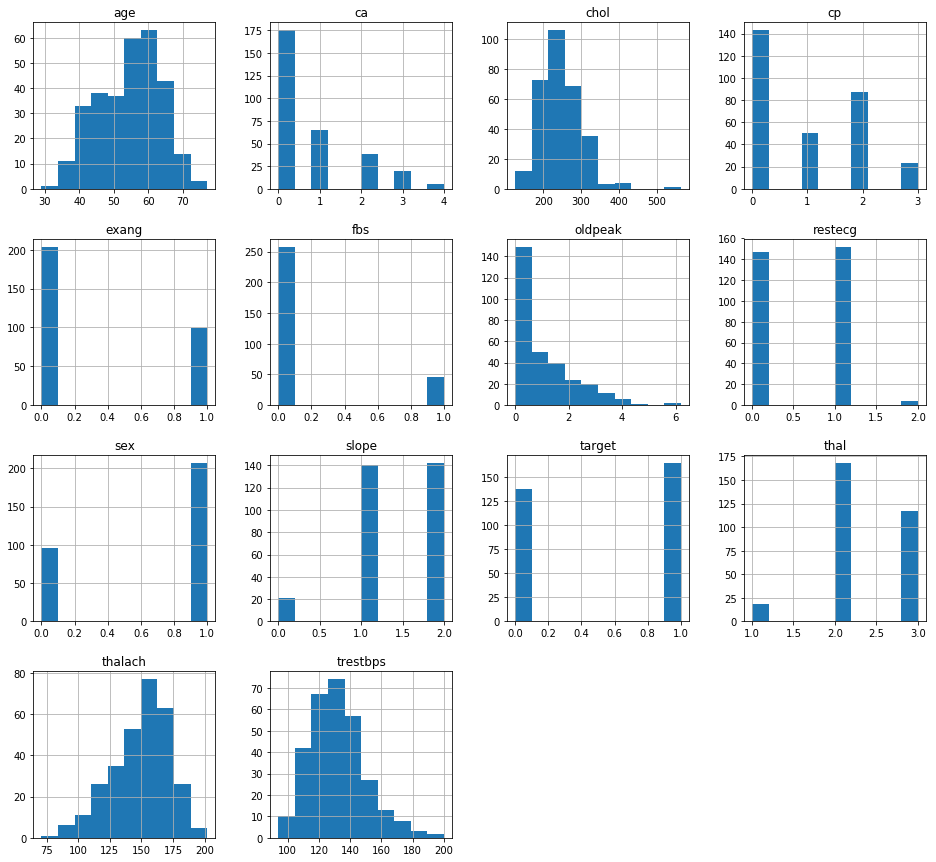

In [14]:
Heart_df.hist(figsize=(16,15))

[back to top](#back)


### 1. Target
<a id="target"></a>

In [15]:
HaveDisease = len(Heart_df[Heart_df.target == 0])
NoDisease = len(Heart_df[Heart_df.target == 1])
print("Number of people having heart disease : ",HaveDisease)
print("Number of people having no heart disease : ",NoDisease)
print("Percentage of patients who don't have heart disease: {:.2f}%".format((NoDisease / (len(Heart_df.target))*100)))
print("Percentage of patients who have heart disease: {:.2f}%".format((HaveDisease / (len(Heart_df.target))*100)))

Number of people having heart disease :  138
Number of people having no heart disease :  165
Percentage of patients who don't have heart disease: 54.46%
Percentage of patients who have heart disease: 45.54%


We have a balanced dataset with 45% cases with heart disease and 55% without heart disease.

Text(0,0.5,'Frequency')

Text(0.5,0,'Target')

Text(0,0.5,'Frequency')

Text(0.5,0,'sex')

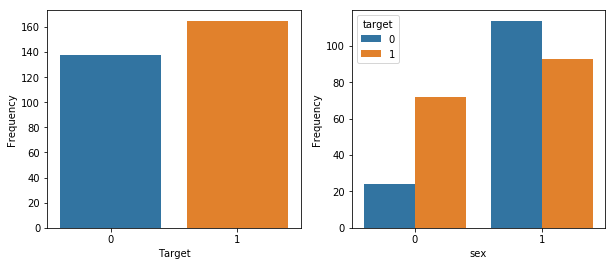

In [16]:
fig,ax=plt.subplots(figsize=(10,4))
plt.subplot(1, 2, 1)
g1=sns.countplot(x="target", data=Heart_df)
g1.set_ylabel('Frequency')
g1.set_xlabel('Target')

plt.subplot(1, 2, 2)
g2=sns.countplot(x='sex',hue='target',data=Heart_df)
g2.set_ylabel('Frequency')
g2.set_xlabel('sex')

We see that percentage of having heart disease is more in men than in women.

Text(0.5,1,'Cholestoral vs Heart Disease')

Text(0.5,1,'Thalach vs Heart Disease')

Text(0.5,1,'Trestbps vs Heart Disease')

Text(0.5,1,'oldpeak vs Heart Disease')

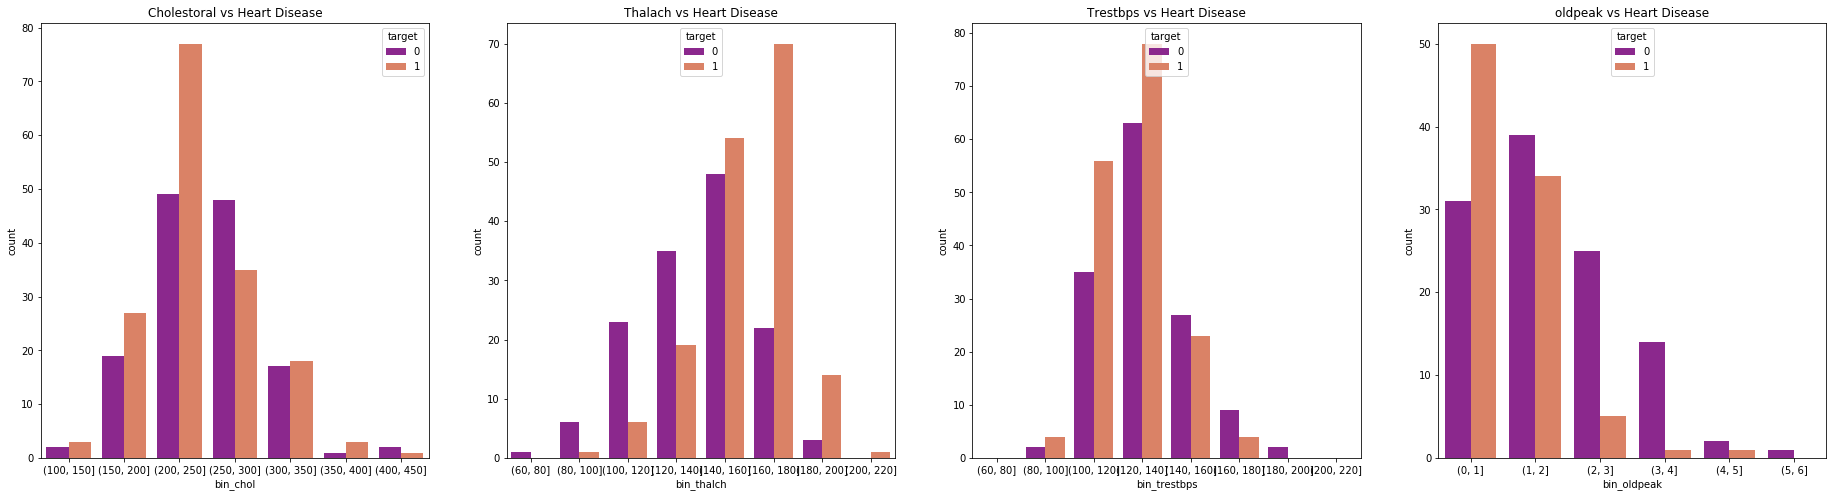

In [17]:
# Target Verses continuous variables

fig,ax=plt.subplots(figsize=(32,8))
plt.subplot(1, 4, 1)
cho_bins = [100,150,200,250,300,350,400,450]
Heart_df['bin_chol']=pd.cut(Heart_df['chol'], bins=cho_bins)
g1=sns.countplot(x='bin_chol',data=Heart_df,hue='target',palette='plasma',linewidth=3)
g1.set_title("Cholestoral vs Heart Disease")

plt.subplot(1, 4, 2)
thal_bins = [60,80,100,120,140,160,180,200,220]
Heart_df['bin_thalch']=pd.cut(Heart_df['thalach'], bins=thal_bins)
g2=sns.countplot(x='bin_thalch',data=Heart_df,hue='target',palette='plasma',linewidth=3)
g2.set_title("Thalach vs Heart Disease")

plt.subplot(1, 4, 3)
trestbps_bins = [60,80,100,120,140,160,180,200,220]
Heart_df['bin_trestbps']=pd.cut(Heart_df['trestbps'], bins=trestbps_bins)
g3=sns.countplot(x='bin_trestbps',data=Heart_df,hue='target',palette='plasma',linewidth=3)
g3.set_title("Trestbps vs Heart Disease")

plt.subplot(1, 4, 4)
oldpeak_bins= [0,1,2,3,4,5,6]
Heart_df['bin_oldpeak']=pd.cut(Heart_df['oldpeak'], bins=oldpeak_bins)
g4=sns.countplot(x='bin_oldpeak',data=Heart_df,hue='target',palette='plasma',linewidth=3)
g4.set_title("oldpeak vs Heart Disease")
plt.show()


Text(0.5,1,'Thal Vs Target')

Text(0.5,1,'slope Vs Target')

Text(0.5,1,'Restecg Vs Target')

Text(0.5,1,'Ca Vs Target')

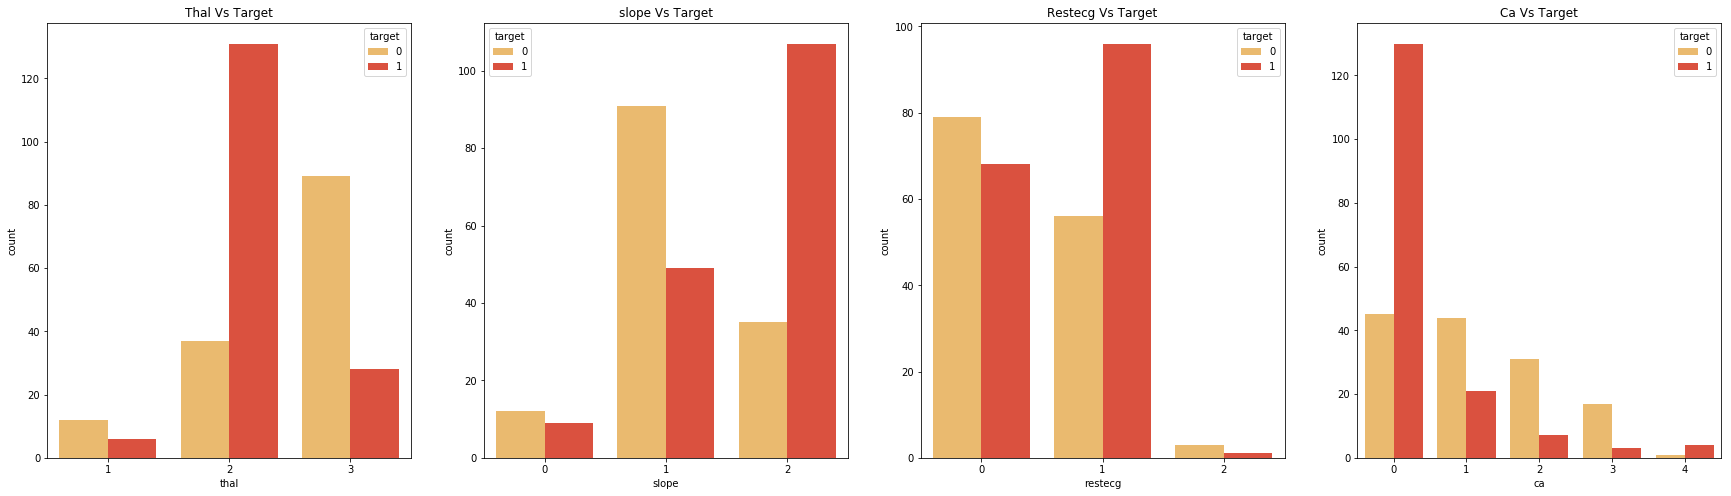

<Figure size 576x432 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1f148ad8f60>,
 [Text(-1.02657,-0.621419,'No'), Text(0.941019,0.569634,'Yes')],
 [Text(-0.59883,-0.362495,'67.3%'), Text(0.513283,0.31071,'32.7%')])

(-1.1928357199817012,
 1.1095182005509117,
 -1.1596553778376186,
 1.1028407322779634)

Text(0.5,1,'Exang')

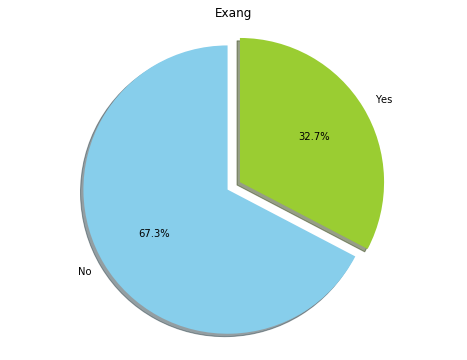

In [18]:
#Target verses categorical variables
# thal, slope , restecg
fig,ax=plt.subplots(figsize=(30,8))


plt.subplot(141)
x1=sns.countplot(x='thal',data=Heart_df,hue='target',palette='YlOrRd',linewidth=3)
x1.set_title('Thal Vs Target')

plt.subplot(142)
x2=sns.countplot(x='slope',data=Heart_df,hue='target',palette='YlOrRd',linewidth=3)
x2.set_title('slope Vs Target')

plt.subplot(143)
x3=sns.countplot(x='restecg',data=Heart_df,hue='target',palette='YlOrRd',linewidth=3)
x3.set_title('Restecg Vs Target')

plt.subplot(144)
x4=sns.countplot(x='ca',data=Heart_df,hue='target',palette='YlOrRd',linewidth=3)
x4.set_title('Ca Vs Target')
plt.show()


plt.figure(figsize=(8,6))
labels = 'No','Yes'
sizes = [len(Heart_df[Heart_df['exang'] == 0]),len(Heart_df[Heart_df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', 
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Exang')
plt.show()

In [19]:
pd.crosstab([Heart_df.sex], [Heart_df.target])
ct_sex = pd.crosstab([Heart_df.sex], [Heart_df.target], normalize='index')
ct_sex
pd.crosstab([Heart_df.fbs], [Heart_df.target])
ct_fbs = pd.crosstab([Heart_df.fbs], [Heart_df.target], normalize='index')
ct_fbs
pd.crosstab([Heart_df.restecg], [Heart_df.target])
ct_ecg = pd.crosstab([Heart_df.restecg], [Heart_df.target], normalize='index')
ct_ecg
pd.crosstab([Heart_df.exang], [Heart_df.target])
ct_exang = pd.crosstab([Heart_df.exang], [Heart_df.target], normalize='index')
ct_exang
pd.crosstab([Heart_df.slope], [Heart_df.target])
ct_slope = pd.crosstab([Heart_df.slope], [Heart_df.target], normalize='index')
ct_slope
pd.crosstab([Heart_df.ca], [Heart_df.target])
ct_ca = pd.crosstab([Heart_df.ca], [Heart_df.target], normalize='index')
ct_ca
pd.crosstab([Heart_df.thal], [Heart_df.target])
ct_thal = pd.crosstab([Heart_df.thal], [Heart_df.target], normalize='index')
ct_thal
pd.crosstab([Heart_df.cp], [Heart_df.target])
ct_cp = pd.crosstab([Heart_df.cp], [ Heart_df.target], normalize='index')
ct_cp

target,0,1
sex,,
0,24,72
1,114,93


target,0,1
sex,,
0,0.250000,0.750000
1,0.550725,0.449275


target,0,1
fbs,,
0,116,142
1,22,23


target,0,1
fbs,,
0,0.449612,0.550388
1,0.488889,0.511111


target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


target,0,1
restecg,,
0,0.537415,0.462585
1,0.368421,0.631579
2,0.750000,0.250000


target,0,1
exang,,
0,62,142
1,76,23


target,0,1
exang,,
0,0.303922,0.696078
1,0.767677,0.232323


target,0,1
slope,,
0,12,9
1,91,49
2,35,107


target,0,1
slope,,
0,0.571429,0.428571
1,0.650000,0.350000
2,0.246479,0.753521


target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


target,0,1
ca,,
0,0.257143,0.742857
1,0.676923,0.323077
2,0.815789,0.184211
3,0.850000,0.150000
4,0.200000,0.800000


target,0,1
thal,,
1,12,6
2,37,131
3,89,28


target,0,1
thal,,
1,0.666667,0.333333
2,0.220238,0.779762
3,0.760684,0.239316


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


target,0,1
cp,,
0,0.727273,0.272727
1,0.180000,0.820000
2,0.206897,0.793103
3,0.304348,0.695652


Based on the above analysis we can see that:
-  We see that 25% of women have heart disease whereas in men its 55%.
-  We see that for patients having fasting blood sugar more that 120 mg/dl there was 49% who had heart disease whereas for fbs less than 120 mg/dl the percent is 45% which is kind of similar
- We see that for patients with normal rest ecg the percent with heart disease is around 37%. For abnormal rest ecg it is 54% and 75% resp.
- If exercise induced angina is true then 75% have heart disease else the percentage is 30%
- If peak exercise ST segment is flat (=1) or downsloping (=0) the percentage of heart disease is higher 65% and 57%. If it is upsloping the percentage is 25%
- As the number of major vessels colored by flouroscopy increases the percentage of heart disease.
- For fixed(=1) and reversible defect (=3) the heart disease Percentage is higher 67% and 76% resp. For normal it is 22%.
- We see that 34% of the total sample who had asymptomatic chest pain had heart disease.

* [Back to Target](#target)
* [back to top](#back)

### 2. Age
<a id='age'></a>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E83AF94E0>]],
      dtype=object)

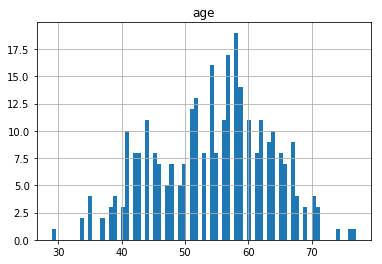

In [21]:
Heart_df.hist("age", bins=75)

<Figure size 1080x432 with 0 Axes>

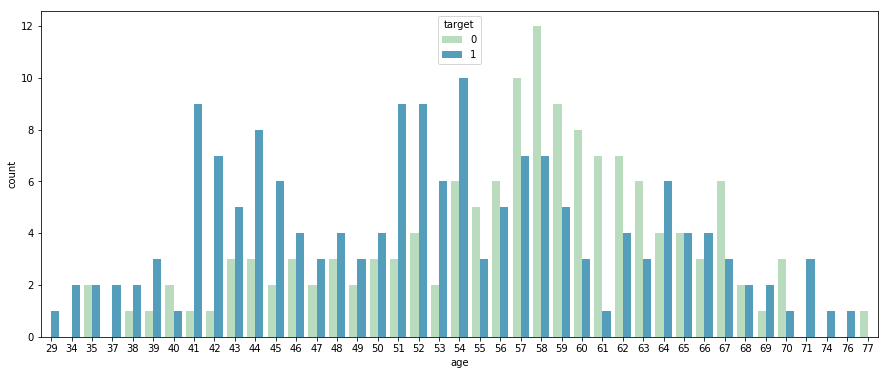

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = Heart_df, hue = 'target',palette='GnBu')
plt.show()

Text(0.5,1,'Age for all')

Text(0.5,1,'Age for Target = 0')

Text(0.5,1,'Age for Target = 1')

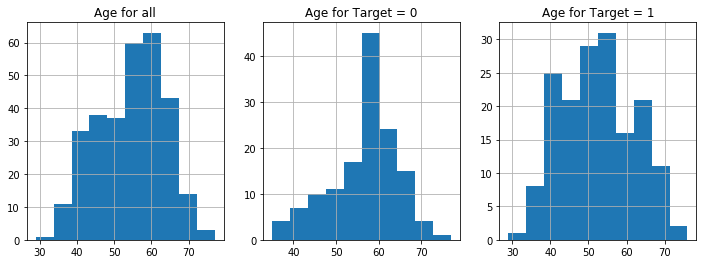

In [23]:
plt.subplot(1,3,1)
Heart_df.age.hist(figsize=(12,4))
plt.title('Age for all')
plt.subplot(1,3,2)
Heart_df[Heart_df.target == 0].age.hist()
plt.title('Age for Target = 0')
plt.subplot(1,3,3)
Heart_df[Heart_df.target == 1].age.hist()
plt.title('Age for Target = 1')

 There are 6 patients with heart disease compared to 13 patients without it among 19 youngsters 
 There are 43 patients with heart disease compared to 90 patients without it among 133 middle aged 
 There are 89 patients with heart disease compared to 62 patients without it among 151 eldely aged 


Text(0.5,1,'Heart Disease Frequency for AgeGroup')

Text(0.5,0,'Agegroups (0-young ages 1-middle ages 2-elderly ages)')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

Text(0,0.5,'Frequency')

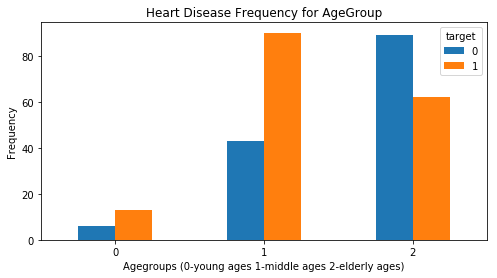

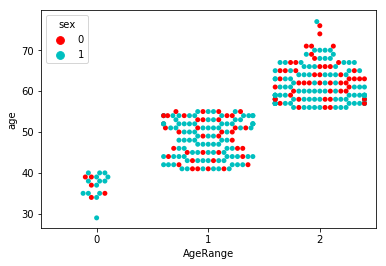

In [24]:
Heart_df['AgeRange']=0

youngAge=Heart_df[(Heart_df.age>=29)&(Heart_df.age<=40)].index
middleAge=Heart_df[(Heart_df.age>40)&(Heart_df.age<=55)].index
elderlyAge=Heart_df[(Heart_df.age>55)].index


#Assigning values to different agerange based on the agegroups
Heart_df.loc[youngAge, 'AgeRange'] = 0
Heart_df.loc[middleAge, 'AgeRange'] = 1
Heart_df.loc[elderlyAge, 'AgeRange'] = 2
#Heart_df['AgeRange'] = Heart_df['AgeRange'].astype(int)

# Target based on the agegroup

#Youngeage
youngeage_0=len(Heart_df[(Heart_df.target==0)&(Heart_df.AgeRange==0)])
youngeage_1=len(Heart_df[(Heart_df.target==1)&(Heart_df.AgeRange==0)])
print(" There are {} patients with heart disease compared to {} patients without it among {} youngsters "
      .format(youngeage_0,youngeage_1,len(youngAge))) 

middleage_0=len(Heart_df[(Heart_df.target==0)&(Heart_df.AgeRange==1)])
middleage_1=len(Heart_df[(Heart_df.target==1)&(Heart_df.AgeRange==1)])
print(" There are {} patients with heart disease compared to {} patients without it among {} middle aged "
      .format(middleage_0,middleage_1,len(middleAge))) 

elderlyage_0=len(Heart_df[(Heart_df.target==0)&(Heart_df.AgeRange==2)])
elderlyage_1=len(Heart_df[(Heart_df.target==1)&(Heart_df.AgeRange==2)])
print(" There are {} patients with heart disease compared to {} patients without it among {} eldely aged "
      .format(elderlyage_0,elderlyage_1,len(elderlyAge))) 


# Plotting the above data
pd.crosstab(Heart_df.AgeRange,Heart_df.target).plot(kind="bar",figsize=(8,4))
plt.title('Heart Disease Frequency for AgeGroup')
plt.xlabel('Agegroups (0-young ages 1-middle ages 2-elderly ages)')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()
sns.swarmplot(x="AgeRange", y="age",hue='sex',
              palette=["r", "c", "y"], data=Heart_df)


<Figure size 1008x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x27e84a0d0b8>,
 [Text(0.601643,0.920883,'Disease '), Text(-0.601643,-0.920883,'No Disease')],
 [Text(0.328169,0.5023,'31.6%'), Text(-0.328169,-0.5023,'68.4%')])

Text(0.5,1,' Youngsters ')

([<matplotlib.patches.Wedge at 0x27e84a3a6d8>,
 [Text(0.579725,0.934836,'Disease '), Text(-0.579725,-0.934836,'No Disease')],
 [Text(0.316214,0.509911,'32.3%'), Text(-0.316214,-0.509911,'67.7%')])

Text(0.5,1,'Middleagers ')

([<matplotlib.patches.Wedge at 0x27e8627ada0>,
 [Text(-0.304912,1.0569,' Disease '), Text(0.304912,-1.0569,'No Disease')],
 [Text(-0.166316,0.576489,'58.9%'), Text(0.166316,-0.576489,'41.1%')])

Text(0.5,1,' Elderlyagers ')

Text(0.5,0.98,'Percentage of Heart Disease found in different age groups')

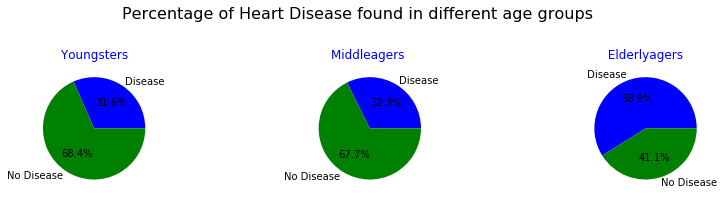

In [25]:
from matplotlib.gridspec import GridSpec

plt.figure(1, figsize=(14,8))
the_grid = GridSpec(3, 3)
colors = ['blue','green']
explode = [0,0]

plt.subplot(the_grid[0, 0], aspect=1, title='Youngsters')
plt.pie([youngeage_0,youngeage_1], explode=explode, labels=['Disease ','No Disease'],
        colors=colors, autopct='%1.1f%%')
plt.title(' Youngsters ',color = 'blue',fontsize = 12)

plt.subplot(the_grid[0, 1], aspect=1, title='Middleagers')
plt.pie([middleage_0,middleage_1], explode=explode, labels=['Disease ','No Disease'], 
        colors=colors, autopct='%1.1f%%')
plt.title('Middleagers ',color = 'blue',fontsize = 12)

plt.subplot(the_grid[0, 2], aspect=1, title='Middleagers')
plt.pie([elderlyage_0,elderlyage_1], explode=explode, labels=[' Disease ','No Disease'], 
        colors=colors, autopct='%1.1f%%')
plt.title(' Elderlyagers ',color = 'blue',fontsize = 12)

plt.suptitle('Percentage of Heart Disease found in different age groups', fontsize=16)
plt.show()



### Analysis:
* The minimum age of the patient is 29 and the maximum age is 77 
* For Age Analysis,the ages are divided into the elderly,middle-aged, young people.
* The total number of Youngsters, middle agers and elderly agers are 19 , 133 and 151  
* There are 6 patients with heart disease compared to 13 patients without it among 19 youngsters 
* There are 43 patients with heart disease compared to 90 patients without it among 133 middle aged 
* There are 89 patients with heart disease compared to 62 patients without it among 151 eldely aged 
* People over the range of 55-65 are more likely to have heart disease.
* Probability of getting heart disease starts to reduce significantly after age of 65.   

* [Back to Target](#target)
* [back to top](#back)

### 2. Sex
<a id='sex'></a>

<BarContainer object of 2 artists>

[Text(0,0,'Male'), Text(0,0,'Female')]

([<matplotlib.patches.Wedge at 0x27e862a9278>,
 [Text(-0.922848,-0.598625,'Male'), Text(1.17453,0.761886,'Female')],
 [Text(-0.503372,-0.326522,'68.3%'), Text(0.755058,0.489784,'31.7%')])

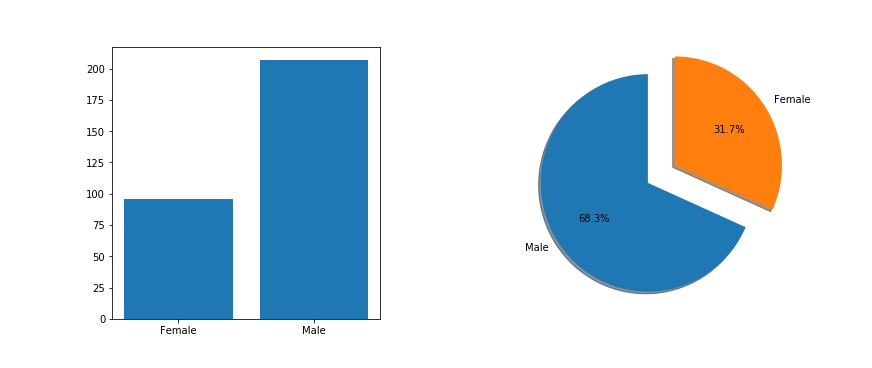

There are 96 female and 207 male patients out of 303 patients in total
The percentage of female and male patients are 31.68 and 68.32 


In [26]:
male_count=len(Heart_df[Heart_df['sex']==1])
female_count=len(Heart_df[Heart_df['sex']==0])

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True)
plt.subplots_adjust(wspace = 0.5)

ax1.bar(Heart_df.sex.unique(),Heart_df.sex.value_counts(),width = 0.8)
ax1.set_xticks(Heart_df.sex.unique())
ax1.set_xticklabels(('Male','Female'))

ax2.pie((male_count,female_count), labels = ('Male','Female'), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0,0.3])
plt.show()

print("There are {} female and {} male patients out of {} patients in total".
      format(female_count,male_count,len(Heart_df.sex)))

print("The percentage of female and male patients are {:.2f} and {:.2f} ".
      format((female_count / (len(Heart_df.sex))*100),(male_count / (len(Heart_df.sex))*100)))



Text(0.5,1,'Age for males')

Text(0.5,1,'Age for Target = 0 males')

Text(0.5,1,'Age for Target = 1 males')

Text(0.5,1,'Age for females')

Text(0.5,1,'Age for Target = 0 females')

Text(0.5,1,'Age for Target = 1 females')

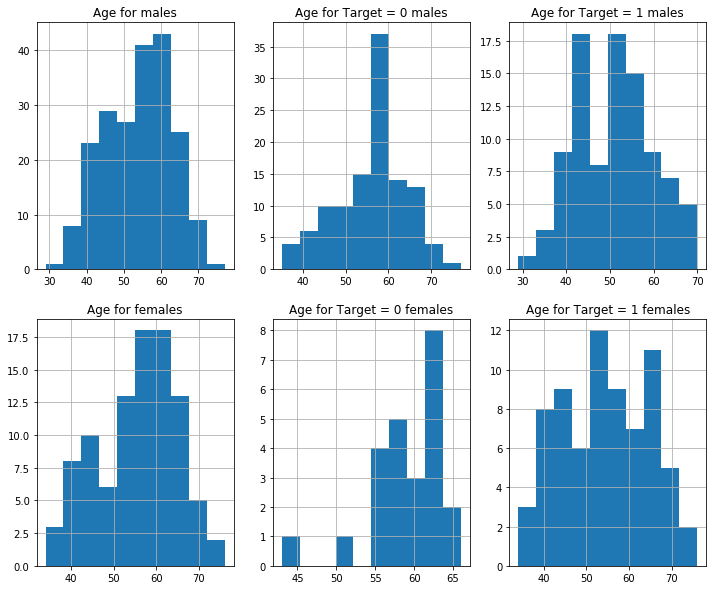

In [27]:
plt.subplot(2,3,1)
Heart_df[Heart_df.sex == 1].age.hist(figsize=(12,10))
plt.title('Age for males')
plt.subplot(2,3,2)
Heart_df[(Heart_df.target == 0) & (Heart_df.sex == 1)].age.hist()
plt.title('Age for Target = 0 males')
plt.subplot(2,3,3)
Heart_df[(Heart_df.target == 1) & (Heart_df.sex == 1)].age.hist()
plt.title('Age for Target = 1 males')

plt.subplot(2,3,4)
Heart_df[Heart_df.sex == 0].age.hist()
plt.title('Age for females')
plt.subplot(2,3,5)
Heart_df[(Heart_df.target == 0) & (Heart_df.sex == 0)].age.hist()
plt.title('Age for Target = 0 females')
plt.subplot(2,3,6)
Heart_df[(Heart_df.target == 1) & (Heart_df.sex == 0)].age.hist()
plt.title('Age for Target = 1 females')

In [28]:
data= Heart_df
agerange='AgeRange'
female_young=len(data[(data.AgeRange==0)&(data.sex==0)])
male_young =len(data[(data.AgeRange==0)&(data.sex==1)])

female_middle=len(data[(data.AgeRange==1)&(data.sex==0)])
male_middle =len(data[(data.AgeRange==1)&(data.sex==1)])

female_elderly=len(data[(data.AgeRange==2)&(data.sex==0)])
male_elderly =len(data[(data.AgeRange==2)&(data.sex==1)])

female_young_0=len(data[(data.target==0)&(data.AgeRange==0)&(data.sex==0)])
female_young_1=len(data[(data.target==1)&(data.AgeRange==0)&(data.sex==0)])
male_young_0=len(data[(data.target==0)&(data.AgeRange==0)&(data.sex==1)])
male_young_1=len(data[(data.target==1)&(data.AgeRange==0)&(data.sex==1)])

female_middle_0=len(data[(data.target==0)&(data.AgeRange==1)&(data.sex==0)])
female_middle_1=len(data[(data.target==1)&(data.AgeRange==1)&(data.sex==0)])
male_middle_0=len(data[(data.target==0)&(data.AgeRange==1)&(data.sex==1)])
male_middle_1=len(data[(data.target==1)&(data.AgeRange==1)&(data.sex==1)])

female_elderly_0=len(data[(data.target==0)&(data.AgeRange==2)&(data.sex==0)])
female_elderly_1=len(data[(data.target==1)&(data.AgeRange==2)&(data.sex==0)])
male_elderly_0=len(data[(data.target==0)&(data.AgeRange==2)&(data.sex==1)])
male_elderly_1=len(data[(data.target==1)&(data.AgeRange==2)&(data.sex==1)])


print("** The tabular data of findings of disease among the 303 Patients**")
from tabletext import to_text

results =[["Agegroup", "Female","Male","Female-0","Female-1","Male-0","Male-1"],
["Youngage", female_young, male_young,female_young_0,female_young_1,
 male_young_0, male_young_1],
["Middleage", female_middle, male_middle, female_middle_0, 
          female_middle_1, male_middle_0, male_middle_1],
["Elderlyage", female_elderly, male_elderly, female_elderly_0, 
          female_elderly_1, female_elderly_0, male_elderly_1]]
print (to_text(results))

** The tabular data of findings of disease among the 303 Patients**
┌────────────┬────────┬──────┬──────────┬──────────┬────────┬────────┐
│ Agegroup   │ Female │ Male │ Female-0 │ Female-1 │ Male-0 │ Male-1 │
├────────────┼────────┼──────┼──────────┼──────────┼────────┼────────┤
│ Youngage   │      5 │   14 │        0 │        5 │      6 │      8 │
├────────────┼────────┼──────┼──────────┼──────────┼────────┼────────┤
│ Middleage  │     39 │   94 │        4 │       35 │     39 │     55 │
├────────────┼────────┼──────┼──────────┼──────────┼────────┼────────┤
│ Elderlyage │     52 │   99 │       20 │       32 │     20 │     30 │
└────────────┴────────┴──────┴──────────┴──────────┴────────┴────────┘


Text(0.5,1,'chol male')

Text(0.5,1,'chol Target = 0 for males')

Text(0.5,1,'chol Target = 1 for males')

Text(0.5,1,'chol female')

Text(0.5,1,'chol Target = 0 for females')

Text(0.5,1,'chol Target = 1 for females')

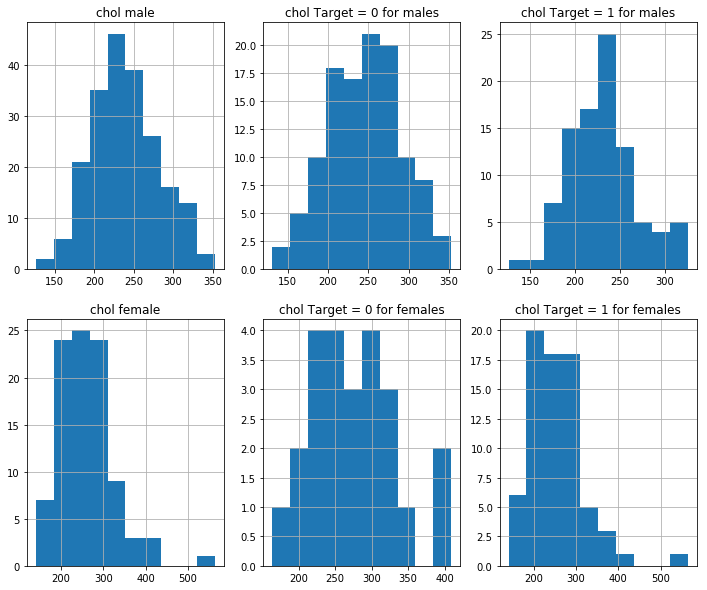

In [29]:
plt.subplot(2,3,1)
Heart_df[Heart_df.sex == 1].chol.hist(figsize=(12,10))
plt.title('chol male')
plt.subplot(2,3,2)
Heart_df[(Heart_df.target == 0) & (Heart_df.sex == 1)].chol.hist()
plt.title('chol Target = 0 for males')
plt.subplot(2,3,3)
Heart_df[(Heart_df.target == 1) & (Heart_df.sex == 1)].chol.hist()
plt.title('chol Target = 1 for males')

plt.subplot(2,3,4)
Heart_df[Heart_df.sex == 0].chol.hist()
plt.title('chol female')
plt.subplot(2,3,5)
Heart_df[(Heart_df.target == 0) & (Heart_df.sex == 0)].chol.hist()
plt.title('chol Target = 0 for females')
plt.subplot(2,3,6)
Heart_df[(Heart_df.target == 1) & (Heart_df.sex == 0)].chol.hist()
plt.title('chol Target = 1 for females')

Text(0.5,1,'max heart rate male')

Text(0.5,1,'max heart-rate Target = 0 for males')

Text(0.5,1,'max heart-rate Target = 1 for males')

Text(0.5,1,'max heart rate female')

Text(0.5,1,'max heart-rate Target = 0 for females')

Text(0.5,1,'max heart-rate Target = 1 for females')

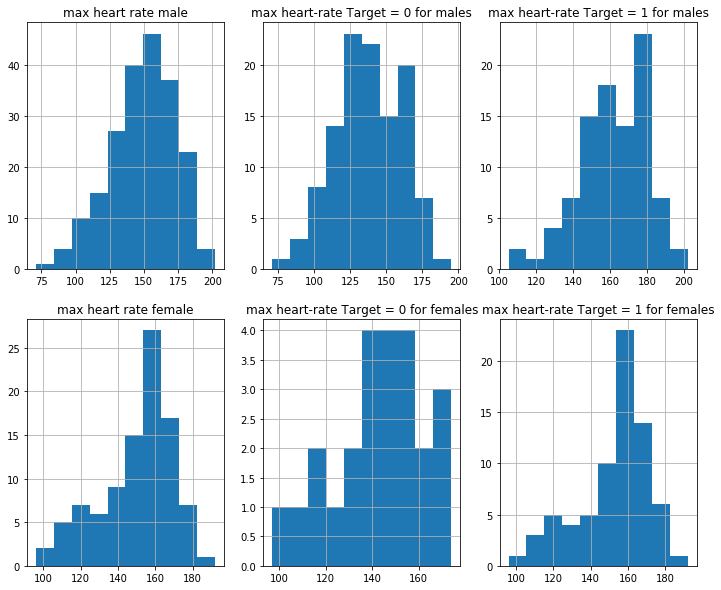

In [30]:
plt.subplot(2,3,1)
Heart_df[Heart_df.sex == 1].thalach.hist(figsize=(12,10))
plt.title('max heart rate male')
plt.subplot(2,3,2)
Heart_df[(Heart_df.target == 0) & (Heart_df.sex == 1)].thalach.hist()
plt.title('max heart-rate Target = 0 for males')
plt.subplot(2,3,3)
Heart_df[(Heart_df.target == 1) & (Heart_df.sex == 1)].thalach.hist()
plt.title('max heart-rate Target = 1 for males')

plt.subplot(2,3,4)
Heart_df[Heart_df.sex == 0].thalach.hist()
plt.title('max heart rate female')
plt.subplot(2,3,5)
Heart_df[(Heart_df.target == 0) & (Heart_df.sex == 0)].thalach.hist()
plt.title('max heart-rate Target = 0 for females')
plt.subplot(2,3,6)
Heart_df[(Heart_df.target == 1) & (Heart_df.sex == 0)].thalach.hist()
plt.title('max heart-rate Target = 1 for females')

Text(0.5,1,'oldpeak male')

Text(0.5,1,'oldpeak Target = 0 for males')

Text(0.5,1,'oldpeak Target = 1 for males')

Text(0.5,1,'oldpeak female')

Text(0.5,1,'oldpeak Target = 0 for females')

Text(0.5,1,'oldpeak Target = 1 for females')

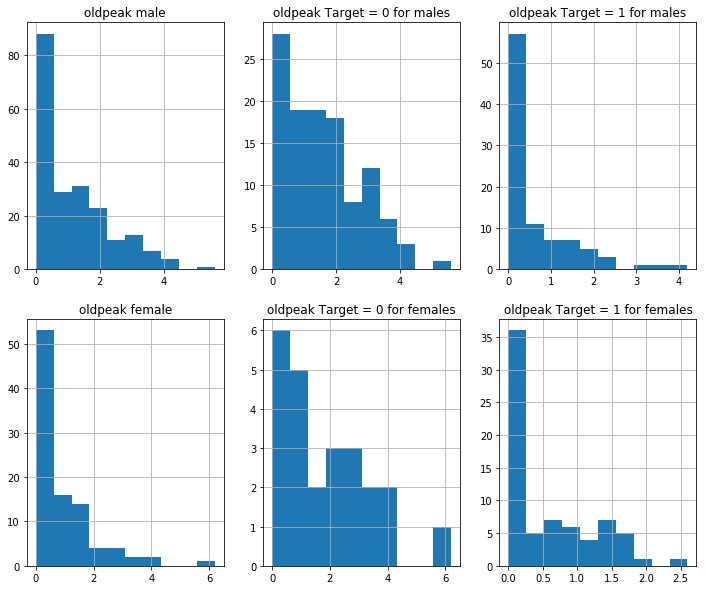

In [31]:
plt.subplot(2,3,1)
Heart_df[Heart_df.sex == 1].oldpeak.hist(figsize=(12,10))
plt.title('oldpeak male')
plt.subplot(2,3,2)
Heart_df[(Heart_df.target == 0) & (Heart_df.sex == 1)].oldpeak.hist()
plt.title('oldpeak Target = 0 for males')
plt.subplot(2,3,3)
Heart_df[(Heart_df.target == 1) & (Heart_df.sex == 1)].oldpeak.hist()
plt.title('oldpeak Target = 1 for males')

plt.subplot(2,3,4)
Heart_df[Heart_df.sex == 0].oldpeak.hist()
plt.title('oldpeak female')
plt.subplot(2,3,5)
Heart_df[(Heart_df.target == 0) & (Heart_df.sex == 0)].oldpeak.hist()
plt.title('oldpeak Target = 0 for females')
plt.subplot(2,3,6)
Heart_df[(Heart_df.target == 1) & (Heart_df.sex == 0)].oldpeak.hist()
plt.title('oldpeak Target = 1 for females')

* Data has lot more entries for Male compare to Female
* In this section, the rate of disease is seen more when the gender value is male. 
* From the above visualisation we see that the age group 55-60yrs among males and the age group 55-65yrs among women has the most heart disease patients.
* There are 96 female and 207 male patients out of 303 patients in total
* The percentage of female and male patients are 31.68 and 68.32 
* The cholestrol for both men and women mostly lies in the range 200 - 350 mg/dl.
* For men with heart disease the maximum heart rate achieved lies in the range 100-175 and without heart disease is from 140-190.
* For women with heart disease the maximum heart rate achieved lies in the range 130-170 and without heart disease is from 150-180.
*  Patients with heart disease have the old peak in the range 0-4, but for without heart disease its mostly 0.
* The cholestrol for both men and women mostly lies in the range 200 - 350 mg/dl.
* In males the resting bp on admission to hospital for heart disease or not is mostly int the range 110-150 mmHg. For women its 120-150 mmgHG.

* [Back to Target](#target)
* [back to top](#back)

### 4. Chest Pain Type 
<a id='cp'></a>

<Figure size 576x432 with 0 Axes>

([<matplotlib.patches.Wedge at 0x27e87688128>,
 [Text(-0.0968181,-1.09573,'Chest Pain Type:0'),
  Text(1.03624,0.369068,'Chest Pain Type:1'),
  Text(-0.209703,1.07983,'Chest Pain Type:2'),
  Text(-1.06887,0.259839,'Chest Pain Type:3')],
 [Text(-0.0528099,-0.597671,'47.2%'),
  Text(0.565221,0.20131,'16.5%'),
  Text(-0.114384,0.588996,'28.7%'),
  Text(-0.58302,0.14173,'7.6%')])

(-1.1007488061044435,
 1.1157249281933113,
 -1.1195424947090913,
 1.1118696412623554)

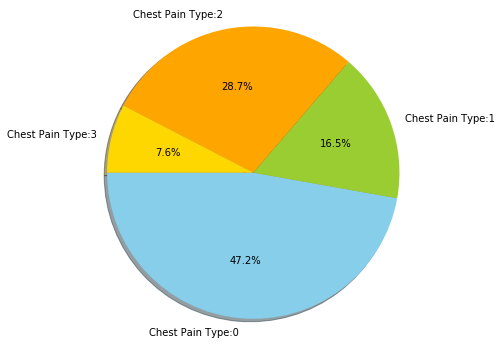

In [32]:
plt.figure(figsize=(8,6))


labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(Heart_df[Heart_df['cp'] == 0]),len(Heart_df[Heart_df['cp'] == 1]),
         len(Heart_df[Heart_df['cp'] == 2]),
         len(Heart_df[Heart_df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

In [33]:
pd.crosstab([Heart_df.cp], [Heart_df.target])
ct_cp = pd.crosstab([Heart_df.cp], [ Heart_df.target], normalize='index')
ct_cp

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


target,0,1
cp,,
0,0.727273,0.272727
1,0.180000,0.820000
2,0.206897,0.793103
3,0.304348,0.695652


Text(0.5,1,'Heart Disease Frequency According To chest pain type')

Text(0.5,0,'chest pain type - (0-asymptomatic 1-atypical angina 2-non-anginal pain 3-typical angina pain)')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

Text(0,0.5,'Frequency')

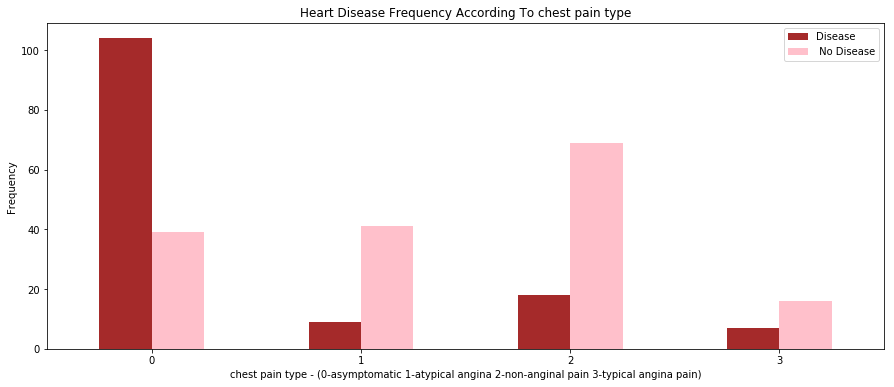

In [51]:
pd.crosstab(Heart_df.cp,data.target).plot(kind="bar",figsize=(15,6),color=['brown','pink' ])
plt.title('Heart Disease Frequency According To chest pain type')
plt.xlabel('chest pain type - (0-asymptomatic 1-atypical angina 2-non-anginal pain 3-typical angina pain)')
plt.xticks(rotation = 0)
plt.legend(["Disease", " No Disease"])
plt.ylabel('Frequency')
plt.show()

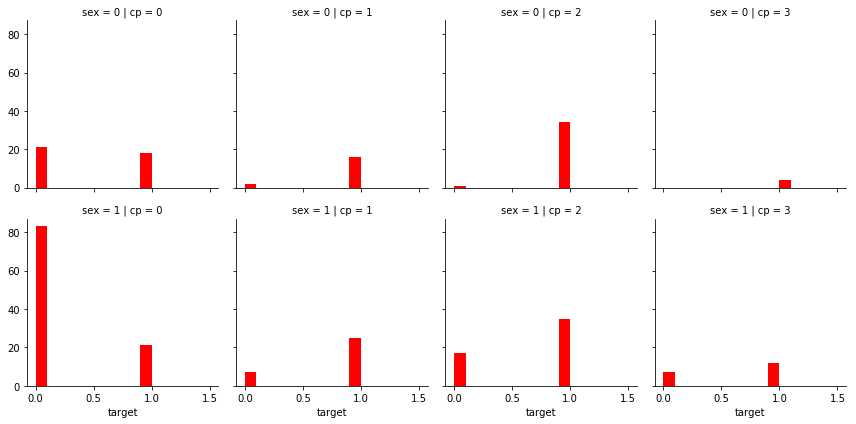

In [52]:
g = sns.FacetGrid(Heart_df, col="cp",  row="sex")
g = g.map(plt.hist, "target",  color="r")

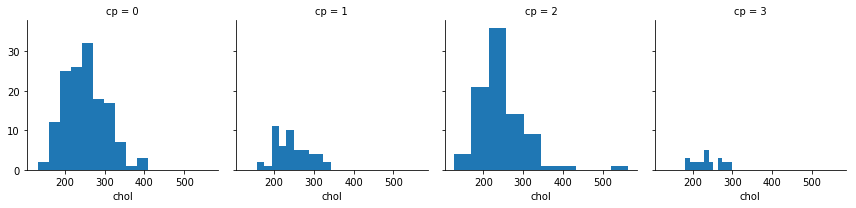

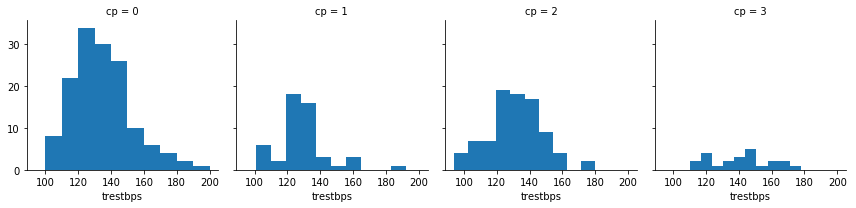

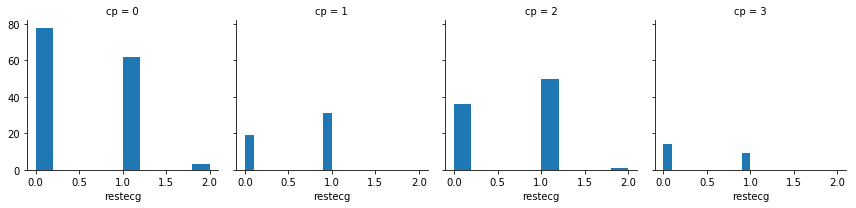

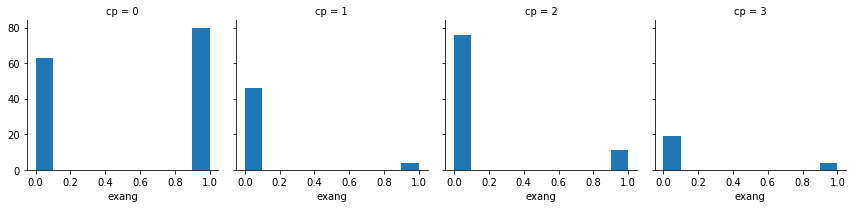

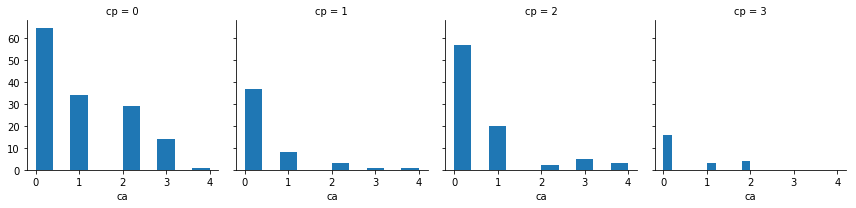

In [53]:
g = sns.FacetGrid(Heart_df, col='cp')
g.map(plt.hist, 'chol', bins=10)

g = sns.FacetGrid(Heart_df, col='cp')
g.map(plt.hist, 'trestbps', bins=10)

g = sns.FacetGrid(Heart_df, col='cp')
g.map(plt.hist, 'restecg', bins=10)

g = sns.FacetGrid(Heart_df, col='cp')
g.map(plt.hist, 'exang', bins=10)

g = sns.FacetGrid(Heart_df, col='cp')
g.map(plt.hist, 'ca', bins=10)

#### Observations:
* Patients with Typical Angina-3 : 23
* Patients with Non-Angina1 pain-2 : 87
* Patients with atypicalAngina-1 : 50
* Patients with Asymptomatic-0 : 143<br>
* From the above analsis, it can be seen that cases with chest pain type 0 are more common with heart disease. But on the other hand, there are problems in all cases of chest pain, such as 1,2,3.
* Women and men with cp type 0 have more chance of having heart disease.
* For cp type 0,1,2 cholestrol level is between 200-300 mg/dl but the significant number are found only for cp type -0 and 1.
* For cp type 0,1 and 2 trestbps is between 110-150 but the significant number are found only for cp type -0.
* Significant numbers are found only in the absence of majors vessels in cp-0 and 2
* Significant numbers of exercise induced angina is observed in cp type-0


* [Back to Target](#target)
* [back to top](#back)

### 5. Fasting blood sugar
<a id='fbs'></a>

Text(0.5,1,'Fbs Vs Target')

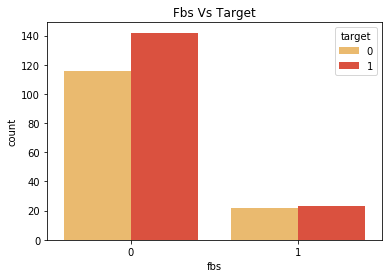

In [54]:
sns.countplot(x='fbs',data=Heart_df,hue='target',palette='YlOrRd',linewidth=3)
plt.title('Fbs Vs Target')

Text(0.5,1,'Fbs Type vs Target based on gender ')

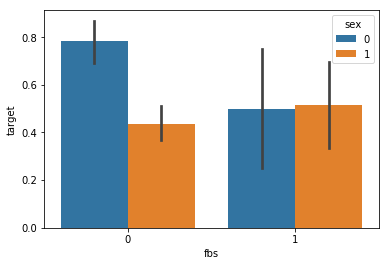

In [55]:
sns.barplot(x = 'fbs', y = 'target', hue = 'sex', data=Heart_df)
ax.set_title('Fbs Type vs Target based on gender ')

<Figure size 720x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x27e89d03da0>,
 [Text(0.522475,-1.08029,'fbs < 120 mg/dl'),
  Text(-0.522475,1.08029,'fbs > 120 mg/dl')],
 [Text(0.304777,-0.630167,'64.3%'), Text(-0.304777,0.630167,'35.7%')])

(-1.1485198887728463,
 1.1610460480603297,
 -1.207921501000533,
 1.2147056496185078)

Text(0.5,1,' cp-0 ')

([<matplotlib.patches.Wedge at 0x27e8ad574e0>,
 [Text(1.04729,-0.585811,'fbs < 120 mg/dl'),
  Text(-1.04729,0.585811,'fbs > 120 mg/dl')],
 [Text(0.610922,-0.341723,'83.8%'), Text(-0.610922,0.341723,'16.2%')])

(-1.1962658204990206,
 1.2015430275971661,
 -1.1547741903416047,
 1.0577702664298587)

Text(0.5,1,' cp-1')

([<matplotlib.patches.Wedge at 0x27e89c9e860>,
 [Text(0.842713,-0.854303,'fbs < 120 mg/dl'),
  Text(-0.842713,0.854303,'fbs > 120 mg/dl')],
 [Text(0.491583,-0.498344,'74.8%'), Text(-0.491583,0.498344,'25.2%')])

(-1.1782087652570923,
 1.197409572677021,
 -1.1986071664089362,
 1.1810753775416876)

Text(0.5,1,' cp-2')

([<matplotlib.patches.Wedge at 0x27e89c71198>,
 [Text(1.16055,-0.30518,'fbs < 120 mg/dl'),
  Text(-1.16055,0.30518,'fbs > 120 mg/dl')],
 [Text(0.676985,-0.178022,'91.8%'), Text(-0.676985,0.178022,'8.2%')])

(-1.2067382058279927,
 1.2138359860401209,
 -1.1331248556517188,
 1.0777787021840213)

Text(0.5,1,' cp-3')

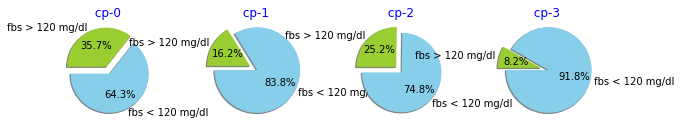

In [56]:
plt.figure(1, figsize=(10,8))
the_grid = GridSpec(4, 4)

labels = 'fbs < 120 mg/dl','fbs > 120 mg/dl'
sizes = [len(Heart_df[Heart_df['fbs'] == 0]),len(Heart_df[Heart_df['cp'] == 0])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0.1)  # explode 1st slice

plt.subplot(the_grid[0, 0], aspect=1, title='cp-0')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', 
        shadow=True, startangle=180)
plt.axis('equal')
plt.title(' cp-0 ',color = 'blue',fontsize = 12)

sizes = [len(Heart_df[Heart_df['fbs'] == 0]),len(Heart_df[Heart_df['cp'] == 1])]
plt.subplot(the_grid[0, 1], aspect=1, title='cp-1')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', 
        shadow=True, startangle=180)
plt.axis('equal')
plt.title(' cp-1' ,color = 'blue',fontsize = 12)

sizes = [len(Heart_df[Heart_df['fbs'] == 0]),len(Heart_df[Heart_df['cp'] == 2])]
plt.subplot(the_grid[0, 2], aspect=1, title='cp-2')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', 
        shadow=True, startangle=180)
plt.axis('equal')
plt.title(' cp-2' ,color = 'blue',fontsize = 12)
          
sizes = [len(Heart_df[Heart_df['fbs'] == 0]),len(Heart_df[Heart_df['cp'] == 3])]
plt.subplot(the_grid[0, 3], aspect=1, title='cp-3')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', 
        shadow=True, startangle=180)
plt.axis('equal')
plt.title(' cp-3'  ,color = 'blue' ,fontsize = 12)

plt.show()


In [57]:
pd.crosstab([ Heart_df[Heart_df.sex==0].fbs], [ Heart_df[Heart_df.sex==0].target], normalize='index')
pd.crosstab([ Heart_df[Heart_df.sex==1].fbs], [ Heart_df[Heart_df.sex==1].target], normalize='index')

target,0,1
fbs,,
0,0.214286,0.785714
1,0.500000,0.500000


target,0,1
fbs,,
0,0.563218,0.436782
1,0.484848,0.515152


** Observations:**
* There are 83.8% of people who have  fbs< 120 mg/dl and 16.2% who have fbs >120 mg/dl.
* Fasting blood sugar level, fbs > 120 are found in equal numbers among males and females whereas more females found to have fbs<120 md/dl than males
* More males with fbs<120 mg/dl are found to have heart disease than females.
* There are more number of people who have cp type 0 and type 2 have fbs < 120 mg/dl .

* [Back to Target](#target)
* [back to top](#back)

### 6. Maximum heart rate achieved (thalach)
<a id='thalach'></a>

Text(0.5,0,'Thalach')

Text(0,0.5,'Count')

Text(0.5,1,'Thalach Counts')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

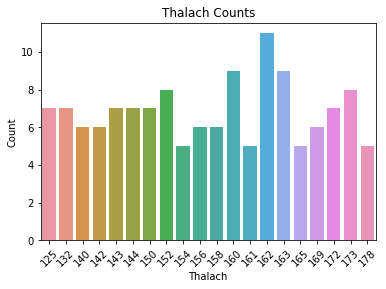

In [58]:
sns.barplot(x=Heart_df.thalach.value_counts()[:20].index,y=Heart_df.thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

In [59]:
age_unique=sorted(Heart_df.age.unique())
age_thalach_values=Heart_df.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(Heart_df[Heart_df['age']==age].thalach)/age_thalach_values[i])

<Figure size 720x360 with 0 Axes>

Text(0.5,0,'Age')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

Text(0,0.5,'Thalach')

Text(0.5,1,'Age vs Thalach')

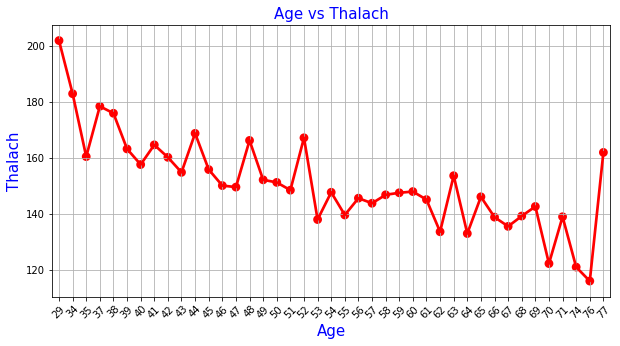

In [60]:
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

We can see that the maximum heart rate achieved decreases as age increases.

* [Back to Target](#target)
* [back to top](#back)

### 7. Thal
<a id='thal'></a>

Text(0.5,1,'Thal vs Target based on gender ')

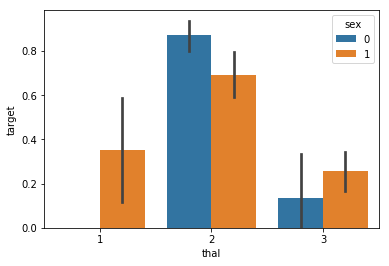

In [61]:
sns.barplot(x = 'thal', y = 'target', hue = 'sex', data=Heart_df)
ax.set_title('Thal vs Target based on gender ')

In [62]:
Heart_df.thal.value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

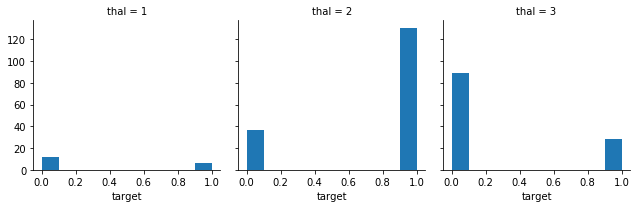

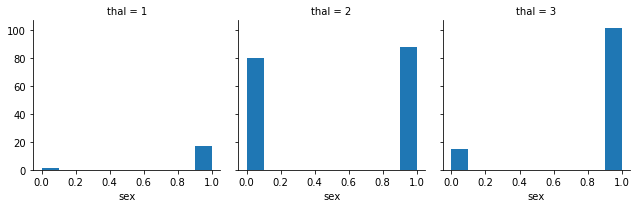

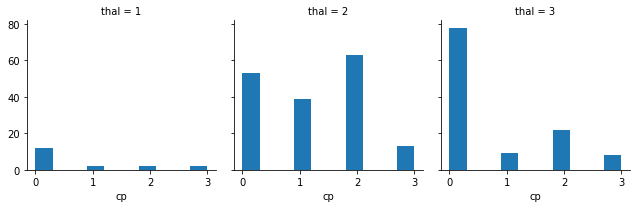

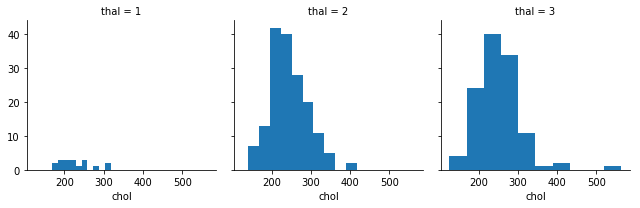

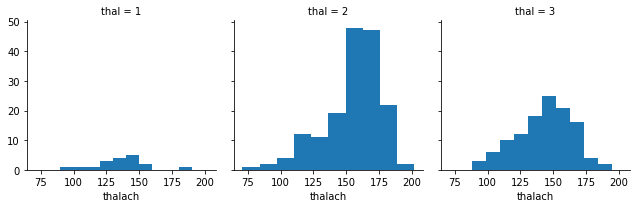

In [63]:
g = sns.FacetGrid(Heart_df, col='thal')
g.map(plt.hist, 'target', bins=10)
g = sns.FacetGrid(Heart_df, col='thal')
g.map(plt.hist, 'sex', bins=10)
g = sns.FacetGrid(Heart_df, col='thal')
g.map(plt.hist, 'cp', bins=10)
g = sns.FacetGrid(Heart_df, col='thal')
g.map(plt.hist, 'chol', bins=10)
g = sns.FacetGrid(Heart_df, col='thal')
g.map(plt.hist, 'thalach', bins=10)

In [64]:
#Target 1
a=len(Heart_df[(Heart_df['target']==1)&(Heart_df['thal']==0)])
b=len(Heart_df[(Heart_df['target']==1)&(Heart_df['thal']==1)])
c=len(Heart_df[(Heart_df['target']==1)&(Heart_df['thal']==2)])
d=len(Heart_df[(Heart_df['target']==1)&(Heart_df['thal']==3)])
print('Target 1 Thal 0: ',a)
print('Target 1 Thal 1: ',b)
print('Target 1 Thal 2: ',c)
print('Target 1 Thal 3: ',d)

#so,Apparently, there is a rate at Thal 2.Now, draw graph
print('*'*50)
#Target 0
e=len(Heart_df[(Heart_df['target']==0)&(Heart_df['thal']==0)])
f=len(Heart_df[(Heart_df['target']==0)&(Heart_df['thal']==1)])
g=len(Heart_df[(Heart_df['target']==0)&(Heart_df['thal']==2)])
h=len(Heart_df[(Heart_df['target']==0)&(Heart_df['thal']==3)])
print('Target 0 Thal 0: ',e)
print('Target 0 Thal 1: ',f)
print('Target 0 Thal 2: ',g)
print('Target 0 Thal 3: ',h)

Target 1 Thal 0:  0
Target 1 Thal 1:  6
Target 1 Thal 2:  131
Target 1 Thal 3:  28
**************************************************
Target 0 Thal 0:  0
Target 0 Thal 1:  12
Target 0 Thal 2:  37
Target 0 Thal 3:  89


[Text(0,0.5,'Target State and Thal State'),
 Text(0.5,0,'Target State and Thal Counter'),
 Text(0.5,1,'Target VS Thal')]

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text xticklabel objects>)

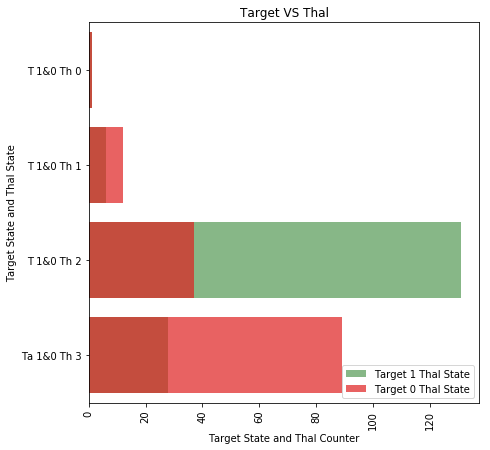

In [65]:
f,ax=plt.subplots(figsize=(7,7))
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,6,131,28],color='green',alpha=0.5,label='Target 1 Thal State')
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,12,37,89],color='red',alpha=0.7,label='Target 0 Thal State')
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Target State and Thal Counter',ylabel='Target State and Thal State',title='Target VS Thal')
plt.xticks(rotation=90)
plt.show()

* More number of females have thal-2(i.e. normal) than males and more males have more thal-2 than thal-3
* The number of people who have Thal-2(normal) is 168 and thal-3(reversable defect) is 117, whereas thal-1(fixed defect)is significantly less which is 18
* People with thal-3 have more chances of having heart disease.
* Both males and females show thal 2(normal) in equal numbers, whereas thal-3(reversible defect) has more number of males
* People who have thal 2 and thal 3 experience chest paintype 0,1,2 but type -0 in significant number
* People who have cholestrol level between 200-200 mg/dl is found have thal 2 and thal 3
* More people achieved maximum heart rate of 150-175  when  having thal 2 

* [Back to Target](#target)
* [back to top](#back)

### Outliers
<a id='outliers'></a>

Text(0.5,1,'Figure 1')

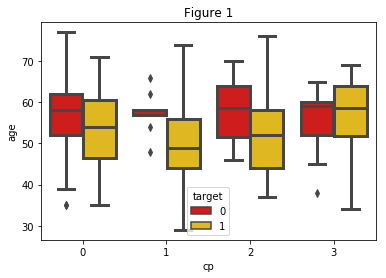

Text(0.5,1,'Figure 2')

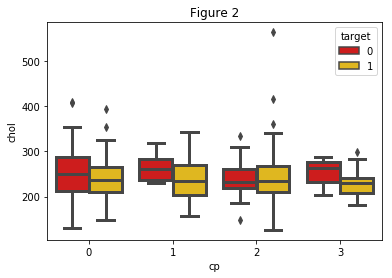

Text(0.5,1,'Figure 3')

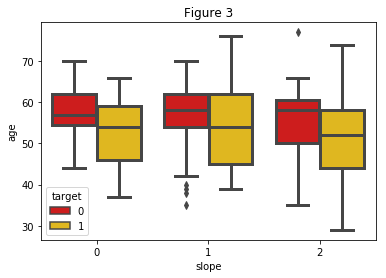

Text(0.5,1,'Figure 4')

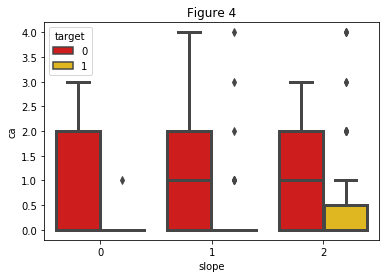

Text(0.5,1,'Figure 5')

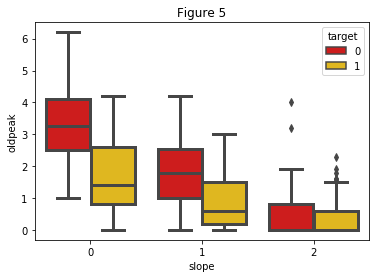

In [66]:
#fig,ax=plt.plot(figsize=(30,8))
#***Categorical Variables: *** Sex, cp, restecg, fbs, slope, exang, thal,  ca<br>
#***Continuos Variables: ***age, trestbps, chol, thalch,oldpeak<br>
#***Predictor Variable: *** target
sns.boxplot(x='cp',y='age',data=Heart_df,hue='target',palette='hot',linewidth=3)
plt.title("Figure 1")
plt.show()

sns.boxplot(x='cp',y='chol',data=Heart_df,hue='target',palette='hot',linewidth=3)
plt.title("Figure 2")
plt.show()

sns.boxplot(x='slope',y='age',data=Heart_df,hue='target',palette='hot',linewidth=3)
plt.title("Figure 3")
plt.show()

sns.boxplot(x='slope',y='ca',data=Heart_df,hue='target',palette='hot',linewidth=3)
plt.title("Figure 4")
plt.show()

sns.boxplot(x='slope',y='oldpeak',data=Heart_df,hue='target',palette='hot',linewidth=3)
plt.title("Figure 5")
plt.show()

In [67]:
Heart_df= Heart_df.drop(['bin_chol','bin_thalch','bin_trestbps','bin_oldpeak','AgeRange'],axis=1)
Heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

We do not see any extreme outliers in the dataset.

* [Back to Target](#target)
* [back to top](#back)

### Correlation matrix
<a id="Corr"></a>

In [68]:
#  Lets look at the correlation matrix and plot it using Pandas Style and Matplotlib
Heart_df.corr().round(decimals =2).style.background_gradient(cmap = 'Oranges')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.1,-0.07,0.28,0.21,0.12,-0.12,-0.4,0.1,0.21,-0.17,0.28,0.07,-0.23
sex,-0.1,1,-0.05,-0.06,-0.2,0.05,-0.06,-0.04,0.14,0.1,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1,0.05,-0.08,0.09,0.04,0.3,-0.39,-0.15,0.12,-0.18,-0.17,0.43
trestbps,0.28,-0.06,0.05,1,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.1,0.06,-0.14
chol,0.21,-0.2,-0.08,0.12,1,0.01,-0.15,-0.01,0.07,0.05,-0,0.07,0.09,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.01,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.4,-0.04,0.3,-0.05,-0.01,-0.01,0.04,1,-0.38,-0.34,0.39,-0.21,-0.12,0.42
exang,0.1,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1,0.29,-0.26,0.12,0.23,-0.44
oldpeak,0.21,0.1,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1,-0.58,0.22,0.21,-0.43


<Figure size 720x720 with 0 Axes>

Text(0.5,1,'correlation Heart Disease - FEMALE')

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'correlation Heart Disease - MALE')

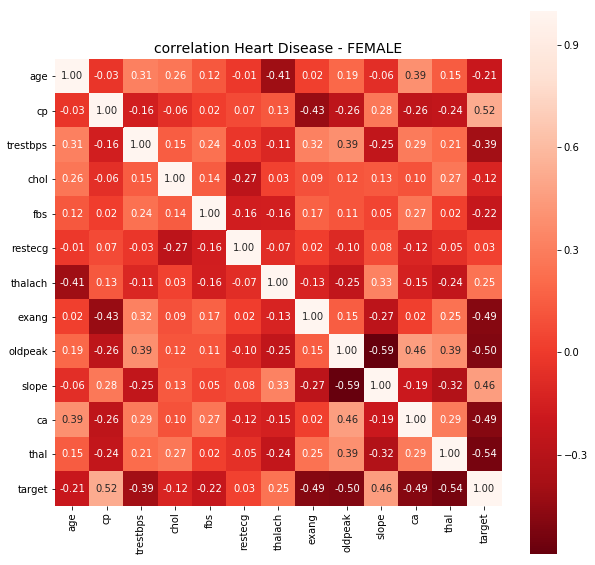

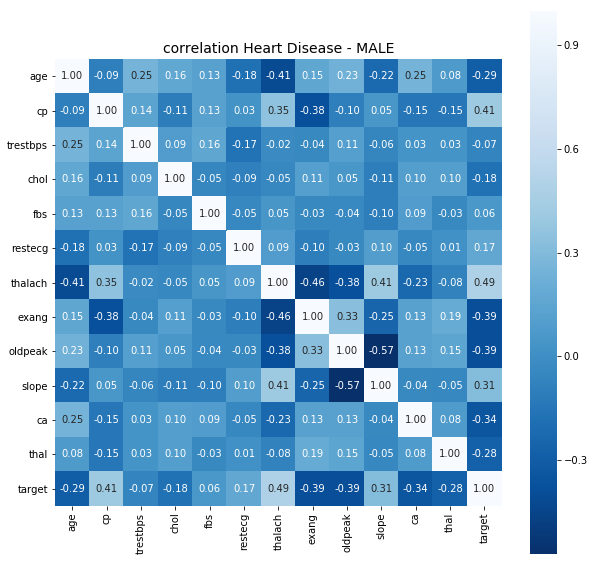

In [69]:
#  Correlation FEMALE - filter dataframe for male/female
dataFemale = Heart_df[(Heart_df['sex'] == 0)]                       # female
dataFemaleCorr = dataFemale.drop(["sex"], axis=1).corr()    # female corr
plt.figure(figsize=(10,10))
plt.title('correlation Heart Disease - FEMALE', fontsize=14)
sns.heatmap(dataFemaleCorr, annot=True, fmt='.2f', square=True, cmap = 'Reds_r')


#  Correlation MALE - filter dataframe for male/female
dataMale   = Heart_df[(Heart_df['sex'] == 1)]                       # male
dataMaleCorr = dataMale.drop(["sex"], axis=1).corr()        # male corr
plt.figure(figsize=(10,10))
plt.title('correlation Heart Disease - MALE', fontsize=14)
sns.heatmap(dataMaleCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')

In [70]:
# Corelation with target

x = Heart_df.corr()
pd.DataFrame(x['target']).sort_values(by='target',ascending = False).style.background_gradient(cmap = 'Greens')
print('correlation Heart Disease - MALE')
dataMaleCorr['target'].sort_values(ascending=False)
print('correlation Heart Disease -FEMALE')
dataFemaleCorr['target'].sort_values(ascending=False)

,target
target,1
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.13723
fbs,-0.0280458
chol,-0.0852391
trestbps,-0.144931
age,-0.225439
sex,-0.280937


correlation Heart Disease - MALE


target      1.000000
thalach     0.485584
cp          0.407136
slope       0.311255
restecg     0.168234
fbs         0.057675
trestbps   -0.065489
chol       -0.175665
thal       -0.277138
age        -0.290993
ca         -0.339703
oldpeak    -0.393169
exang      -0.393720
Name: target, dtype: float64

correlation Heart Disease -FEMALE


target      1.000000
cp          0.522233
slope       0.458207
thalach     0.252103
restecg     0.032553
chol       -0.121769
age        -0.207531
fbs        -0.218218
trestbps   -0.391957
exang      -0.486509
ca         -0.487205
oldpeak    -0.500454
thal       -0.536248
Name: target, dtype: float64

**Correlation of females with all the features** - chest pain type and slope, thalach, oldpeak, exang have a more significant correlation with heart disease in females.<br>
**Correlation male patients with all the features** - thal has a more significant correlation with heart disease in males than chest pain type.<br>
** Overall there is not much of correlation betwen the features.**

* [Back to Target](#target)
* [back to top](#back)

# Visualization to Rule Them All

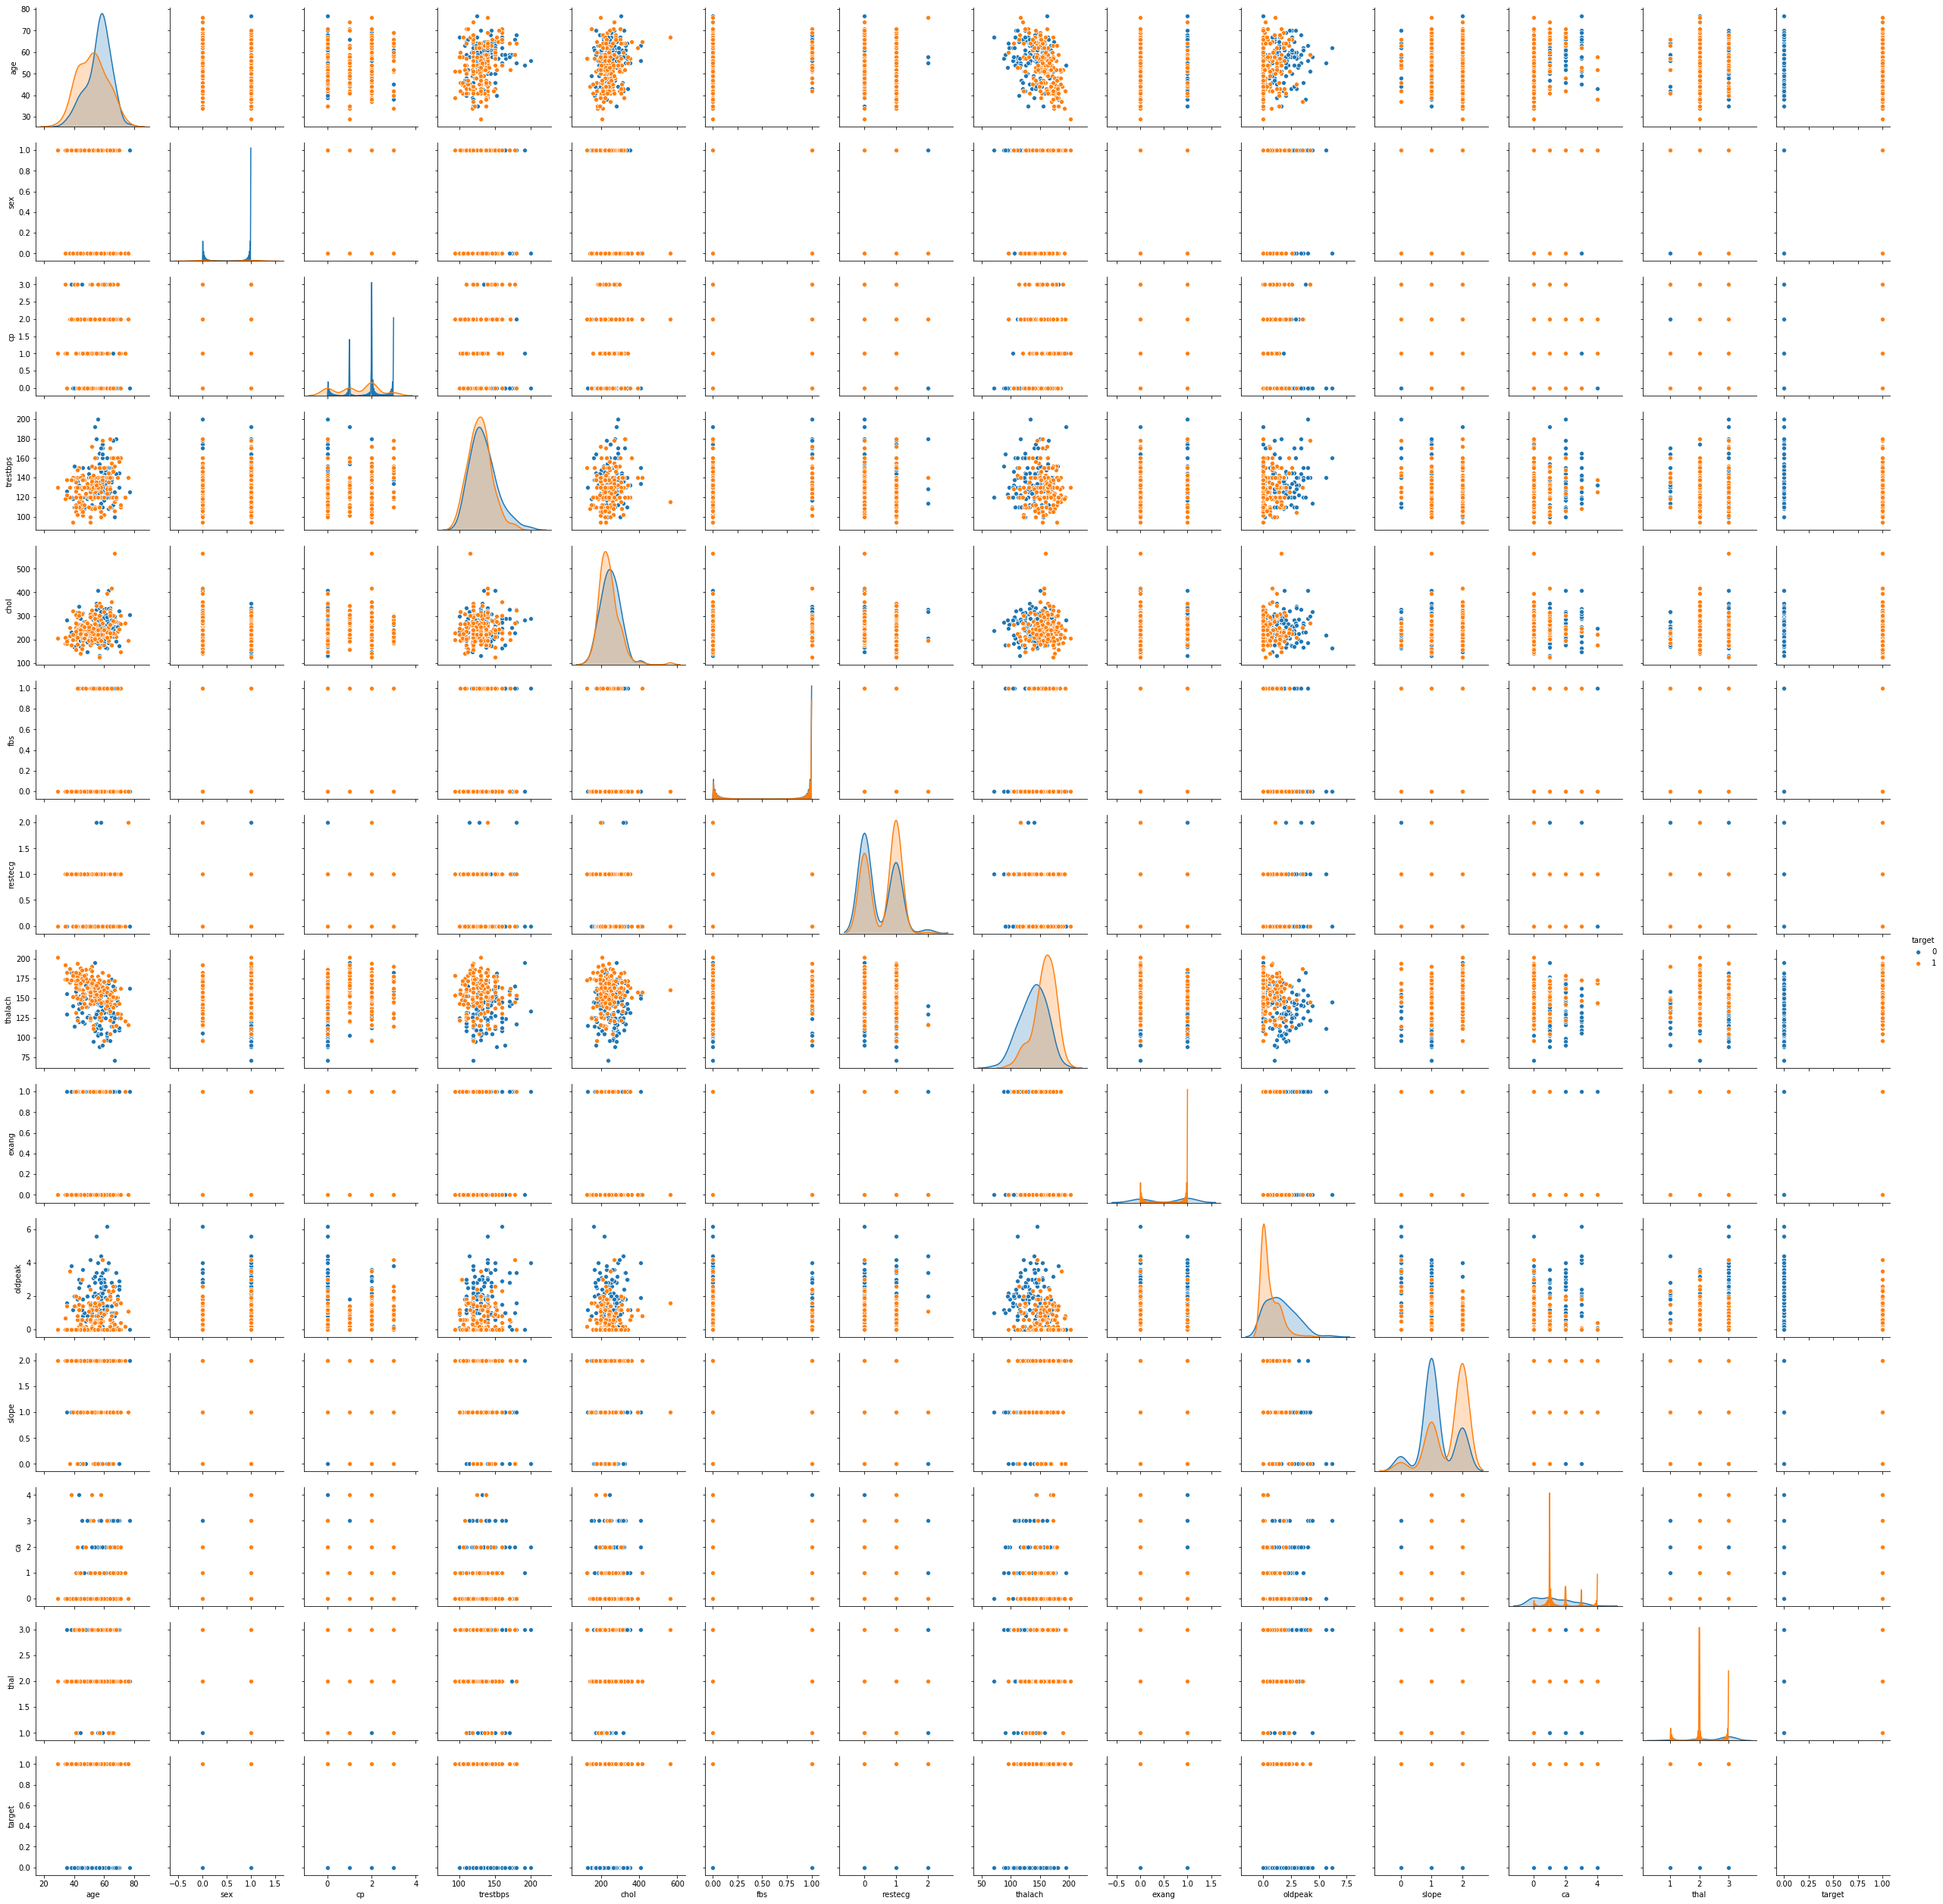

In [71]:
sns.pairplot(Heart_df,hue="target")
plt.show()

In [72]:
# Set X as feature data and y as target data 

X = Heart_df.drop(['target'],axis =1)
y = Heart_df.target


### Chi-Square for Features
<a id='chisquare'></a>

In [73]:
from sklearn import feature_selection
chi2, pval = feature_selection.chi2(X,y)
print(chi2)

[ 23.28662399   7.57683451  62.59809791  14.8239245   23.93639448
   0.20293368   2.97827075 188.32047169  38.91437697  72.64425301
   9.8040952   66.44076512   5.82386062]


In [74]:
Heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The variables thalach, oldpeak, ca, cp and exang seem to be more influential on the target.

### Feature selection method to check dependency among feature & target

In [75]:
dep = pd.DataFrame(chi2)
dep.columns = ['Dependency']
dep.index = X.columns
dep.sort_values('Dependency', ascending = False).style.background_gradient(cmap = 'terrain')

,Dependency
thalach,188.32
oldpeak,72.6443
ca,66.4408
cp,62.5981
exang,38.9144
chol,23.9364
age,23.2866
trestbps,14.8239
slope,9.8041
sex,7.57683


 Looks like **"fbs" ** has lowest effect on target and **"thalach"** has highest
 
 [back to top](#back)

## Creating the model
<a id='model'></a>

In [76]:
#Creating dummy variables for the categorical variables

dummy_restecg = pd.get_dummies(Heart_df['restecg'], prefix='restecg')
Heart_df = Heart_df.join(dummy_restecg)
dummy_cp = pd.get_dummies(Heart_df['cp'], prefix='cp')
Heart_df = Heart_df.join(dummy_cp)
dummy_slope = pd.get_dummies(Heart_df['slope'], prefix='slope')
Heart_df = Heart_df.join(dummy_slope)
dummy_thal = pd.get_dummies(Heart_df['thal'], prefix='thal')
Heart_df = Heart_df.join(dummy_thal)
Heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,0,1,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,1,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,1,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,0,0,0,1,0,1,0


In [77]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
Heart_df.iloc[:, [0,3,4,7,9]] = sc_X.fit_transform(Heart_df.iloc[:, [0,3,4,7,9]])
Heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,...,0,0,0,1,1,0,0,1,0,0
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,...,0,0,1,0,1,0,0,0,1,0
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,...,0,1,0,0,0,0,1,0,1,0
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,...,0,1,0,0,0,0,1,0,1,0
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,...,1,0,0,0,0,0,1,0,1,0


### Logistic Regression using stats model
<a id='statsmodel'></a>

In [78]:
Heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'restecg_0',
       'restecg_1', 'restecg_2', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'slope_0',
       'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [79]:
#Using stats model for Logistic Regression for all the variables
# Avoid the dummy variable trap by excluding the 0th categorical variable
predictors = [ 'age', 'sex', 'cp_1', 'cp_2', 'cp_3', 'trestbps', 'chol', 'fbs', 'restecg_1', 'restecg_2',
                  'thalach', 'exang', 'oldpeak', 'slope_1', 'slope_2', 'ca', 'thal_1', 'thal_2', 'thal_3']
# Fit the model
m = Logit(Heart_df['target'], Heart_df[predictors])
m = m.fit()

Optimization terminated successfully.
         Current function value: 0.333968
         Iterations 7


### Model Summary
<a id='summary1'></a>

In [80]:
m.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.515     
Dependent Variable: target           AIC:              240.3845  
Date:               2019-04-12 14:23 BIC:              310.9454  
No. Observations:   303              Log-Likelihood:   -101.19   
Df Model:           18               LL-Null:          -208.82   
Df Residuals:       284              LLR p-value:      8.7363e-36
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age           -0.0027    0.2142  -0.0126  0.9900  -0.4225   0.4171
sex           -1.5280    0.5222  -2.9263  0.0034  -2.5515  -0.5046
cp_1           1.0032    0.5614   1.7869  0.0739  -0.0971   2.1036
cp_2           1.9605    0.4782   4.0993  0.0000   1.0231   2.8978
cp_3           2.0483    0.6501   3.1509  0.0016   0.7742   3.3225
trestbps      -0.2968    0.1868  -1.5886  0.1122  -0.6629   0.0694
chol          -0.2144    0.2008  -1.0679  0.2856  -0.6079   0.1791
fbs            0.0906    0.5510   0.1645  0.8694  -0.9893   1.1706
restecg_1      0.5545    0.3735   1.4846  0.1376  -0.1775   1.2865
restecg_2     -0.2711    2.2617  -0.1199  0.9046  -4.7039   4.1616
thalach        0.3931    0.2470   1.5910  0.1116  -0.0911   0.8772
exang         -0.7846    0.4245  -1.8482  0.0646  -1.6167   0.0475
oldpeak       -0.5658    0.2613  -2.1651  0.0304  -1.0781  -0.0536
slope_1       -0.7447    0.8610  -0.8649  0.3871  -2.4323   0.9429
slope_2        0.1917    0.9365   0.2047  0.8378  -1.6439   2.0273
ca            -0.8203    0.2032  -4.0371  0.0001  -1.2186  -0.4221
thal_1         1.6879    1.1511   1.4664  0.1425  -0.5682   3.9440
thal_2         1.6666    0.9445   1.7645  0.0776  -0.1846   3.5179
thal_3         0.3198    1.0084   0.3171  0.7512  -1.6567   2.2963
=================================================================

"""

### Confusion Matrix
 <a id='mat1'></a>

In [81]:
conf_mat = m.pred_table()

tn, fp, fn, tp = conf_mat.flatten()
print ('True Positive :', tp)
print ('False Negative:', fn)
print ('False Positive:', fp)
print ('True Negative :', tn)

acc = (tp + tn) / np.sum(conf_mat)
print ("Accuracy of the model is: %1.2f" % acc)

prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)

True Positive : 150.0
False Negative: 15.0
False Positive: 27.0
True Negative : 111.0
Accuracy of the model is: 0.86
Model's precision is 0.85 and it's recall is 0.91
Mathews correlation coefficient between the estimates and the true response is: 0.72


In [82]:
#Adding the probability for each record from the model
Heart_df.loc[:, 'p'] = m.predict(Heart_df[predictors])

Text(0.5,0,'logit(p)')

Text(0,0.5,'p')

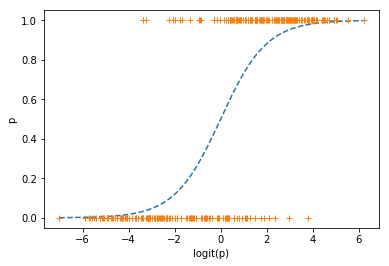

In [83]:
##Plotting the model probability output
Heart_df = Heart_df.sort_values(by = ['p'], axis = 0)
plt.plot(logit(Heart_df.p), Heart_df.p, '--')
plt.plot(logit(Heart_df.p), Heart_df.target, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

In [84]:
# Set discrimination thresholds
ths = np.arange(0., 1.0, 0.025)
#th = 0
# Containers
sensitivity = []
specificity = []
accuracy = []
matthews = []

old_settings = np.seterr(all='ignore')  #seterr to known value
np.seterr(divide='ignore')
# Main loop
for th in ths:
    # Generate estimates
    conf_mat = m.pred_table(threshold=th)
    # Extract TN, FP, ...
    tn, fp, fn, tp = conf_mat.flatten()
    
    # Calculate sensitivity and specificity
    sens = (1. * tp) / (tp + fn)
    spec = (1. * tn) / (tn + fp)    
    
    # Calculate ACC and MCC
    acc = (tp + tn) / np.sum(conf_mat)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))    

    # Add to containers
    sensitivity.append(sens)
    specificity.append(spec)
    accuracy.append(acc)
    if np.isnan(mcc) == True:
        mcc = 0
    matthews.append(mcc)

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [85]:
# Bind all the numbers together
roc = pd.DataFrame({'discret_thr' : ths, 
                    'sensitivity' : sensitivity, 
                    'specificity' : specificity,
                    '_specificity' : [1 - x for x in specificity],
                    'accuracy' : accuracy, 
                    'matthews' : matthews})

# Sort by 1 - specificity so we can plot it easily
roc = roc.sort_values(by = "_specificity")
roc.head()

,discret_thr,sensitivity,specificity,_specificity,accuracy,matthews
39,0.975,0.212121,0.992754,0.007246,0.567657,0.315329
38,0.950,0.351515,0.985507,0.014493,0.640264,0.421174
37,0.925,0.436364,0.985507,0.014493,0.686469,0.489021
36,0.900,0.503030,0.978261,0.021739,0.719472,0.531631
35,0.875,0.533333,0.971014,0.028986,0.732673,0.546231


###  Plotting the ROC curve
<a id='curve1'></a>

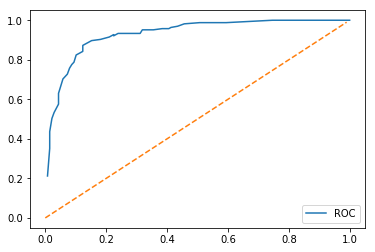

In [106]:

plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')
plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.legend(loc = 4)

In [107]:
auc = np.trapz(y = roc.sensitivity, x = roc._specificity)
print ("Area under ROC curve = %1.2f" % auc)

Area under ROC curve = 0.93


#### Trying backward elimination i.e. removing the variable with highest p value until all pvalues are less than 0.05.  We got the below final variables

In [108]:
predictors_mod = [ 'sex', 'cp', 'trestbps', 'restecg',
                 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Fit the model
m_mod = Logit(Heart_df['target'], Heart_df[predictors_mod])
m_mod = m_mod.fit()

Optimization terminated successfully.
         Current function value: 0.363086
         Iterations 7


In [109]:
m_mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.473     
Dependent Variable: target           AIC:              240.0302  
Date:               2019-04-12 14:46 BIC:              277.1675  
No. Observations:   303              Log-Likelihood:   -110.02   
Df Model:           9                LL-Null:          -208.82   
Df Residuals:       293              LLR p-value:      1.0509e-37
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sex           -1.3243    0.4088  -3.2398  0.0012  -2.1255  -0.5232
cp             1.0111    0.1776   5.6920  0.0000   0.6630   1.3593
trestbps      -0.3696    0.1775  -2.0829  0.0373  -0.7174  -0.0218
restecg        0.7140    0.3305   2.1601  0.0308   0.0662   1.3618
thalach        0.4378    0.2090   2.0951  0.0362   0.0282   0.8474
exang         -0.7044    0.3989  -1.7659  0.0774  -1.4862   0.0774
oldpeak       -0.5761    0.2422  -2.3785  0.0174  -1.0509  -0.1014
slope          1.0279    0.3003   3.4224  0.0006   0.4392   1.6166
ca            -0.7704    0.1866  -4.1290  0.0000  -1.1361  -0.4047
thal          -0.4581    0.2125  -2.1556  0.0311  -0.8746  -0.0416
=================================================================

"""

In [110]:
conf_mat_mod = m_mod.pred_table()
tn, fp, fn, tp = conf_mat_mod.flatten()

print ('True Positive :', tp)
print ('False Negative:', fn)
print ('False Positive:', fp)
print ('True Negative :', tn)

acc = (tp + tn) / np.sum(conf_mat_mod)
print ("Accuracy of the model is: %1.2f" % acc)

prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

True Positive : 148.0
False Negative: 17.0
False Positive: 25.0
True Negative : 113.0
Accuracy of the model is: 0.86
Model's precision is 0.86 and it's recall is 0.90


The Accuracy, precision or recall hasnt increased after removing the variables 'Age', 'chol' and 'fbs'. Also the Pseudo-Rsquared also decreased slightly from 0.515 to 0.473. Hence we will use the model with all the variables.

[back to top](#back)

### Logistic Model using sklearn
<a id='sklearn'></a>

In [91]:
Heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'restecg_0',
       'restecg_1', 'restecg_2', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'slope_0',
       'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'p'],
      dtype='object')

In [92]:
#Logistic Regression using sklearn
#Splitting data into train and test dataset(70-30) 
X1 = Heart_df.iloc[:, [0,1,3,4,5,7,8,9,11,15,16,18,19,20,22,23,25,26]].values
Y1 = Heart_df.iloc[:, 13].values
X1_Train, X1_Test, Y1_Train, Y1_Test = train_test_split(X1, Y1, test_size = 0.3, random_state = 101)

In [93]:
# Fitting the Logistic Regression into the Training set
#from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X1_Train, Y1_Train)
print('Intercept: ',classifier1.intercept_)
print('Coefficients: ', classifier1.coef_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Intercept:  [0.76564485]
Coefficients:  [[ 0.00547855 -0.88260868 -0.08076047  0.04575704  0.20991688  0.10768912
  -0.83166965 -0.67438769 -0.65705342  0.54486856  0.04931855  0.59338078
   1.54370187  1.12475128 -0.55489393  0.49749489  0.47434572 -1.07943183]]


In [94]:
print("Logistic Train accuracy: ",classifier1.score(X1_Train,Y1_Train))
print("Logistic Test accuracy: ", classifier1.score(X1_Test,Y1_Test))

Logistic Train accuracy:  0.8584905660377359
Logistic Test accuracy:  0.8681318681318682


### Confusion Matrix
<a id='mat2'></a>

array([[32,  8],
       [ 4, 47]], dtype=int64)

<Figure size 576x360 with 0 Axes>

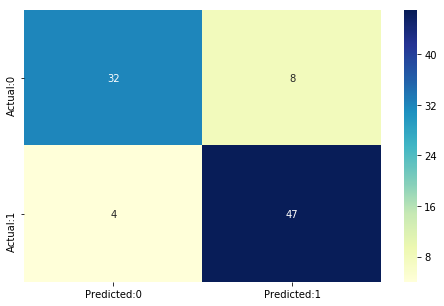

In [95]:
Y1_Pred = classifier1.predict(X1_Test)
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y1_Test, Y1_Pred)
cm1
conf_matrix=pd.DataFrame(data=cm1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Classification report
<a id='report2'></a>

In [96]:

from sklearn.metrics import classification_report
target_names = ['Heart Disease', 'No Heart Disease']
print(classification_report(Y1_Test, Y1_Pred, target_names=target_names))

                  precision    recall  f1-score   support

   Heart Disease       0.89      0.80      0.84        40
No Heart Disease       0.85      0.92      0.89        51

     avg / total       0.87      0.87      0.87        91



### ROC Curve
<a id='curve2'></a>

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Receiver operating characteristic')

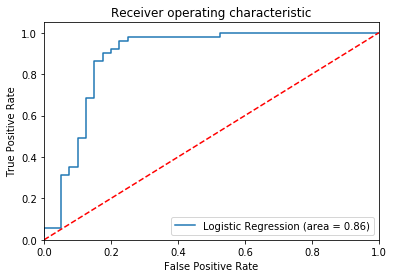

In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y1_Test, classifier1.predict(X1_Test))
fpr, tpr, thresholds = roc_curve(Y1_Test, classifier1.predict_proba(X1_Test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [98]:
#sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])
from sklearn import metrics
print("Area under Curve = ", metrics.roc_auc_score(Y1_Test, Y1_Pred))

Area under Curve =  0.8607843137254901


[back to top](#back)

### Naive Bayes Model
<a id='NB'></a>

In [99]:
#Naive Bayes Modelling using scales variables only, no dummy variables
#Splitting data into train and test dataset(70-30) 
X = Heart_df.iloc[:, 0:13].values
Y = Heart_df.iloc[:, 13].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [100]:
clf = GaussianNB()
# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set for the gaussian classifier
clf.fit(X_Train, Y_Train) 

#calling the cross validation function
cv_results = model_selection.cross_val_score(clf, X_Train, Y_Train, scoring=scoring)

#Model Performance
#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB model accuracy', cv_results.mean(), cv_results.std())
print(msg)

#Predicting for the Test(Validation) Set
pred_clf = clf.predict(X_Test)

print("NB test Accuracy :", clf.score(X_Test, Y_Test))

GaussianNB(priors=None)

NB model accuracy: 0.806439 (0.037940)
NB test Accuracy : 0.8571428571428571


### Confusion Matrix
<a id='mat3'></a>

<Figure size 576x360 with 0 Axes>

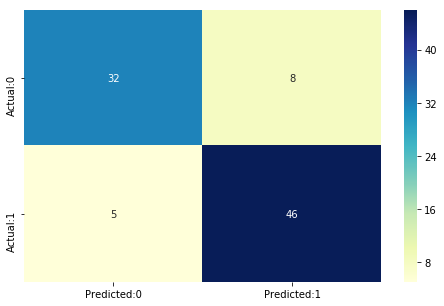

In [101]:
cm = metrics.confusion_matrix(Y_Test, pred_clf)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Classification report 
<a id='report3'></a>

In [102]:
target_names = ['Heart Disease', 'No Heart Disease']
print(classification_report(Y_Test, pred_clf, target_names=target_names))

                  precision    recall  f1-score   support

   Heart Disease       0.86      0.80      0.83        40
No Heart Disease       0.85      0.90      0.88        51

     avg / total       0.86      0.86      0.86        91



[back to top](#back)

### ROC curve
<a id='curve3'></a>

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Receiver operating characteristic')

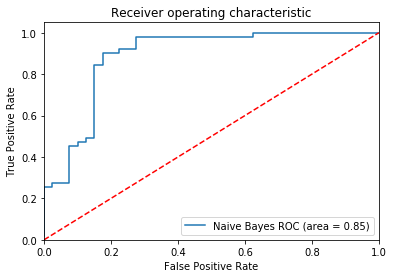

In [103]:
roc_auc = roc_auc_score(Y_Test, clf.predict(X_Test))
fpr2, tpr2, thresholds2 = roc_curve(Y_Test, clf.predict_proba(X_Test)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='Naive Bayes ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [104]:
#sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])
metrics.roc_auc_score(Y_Test, pred_clf)

0.8509803921568627

[back to top](#back)

### Summary
<a id='summary'></a>

The dataset has no null values. Based on our analysis we did not drop any variables.

There were not any outliers in the dataset. There were 2 records having missing values for thal variable which we replaced with the value of records having similar values for other columns.

We have a balanced dataset with 45% cases with heart disease and 55% without heart disease. Men are more prone to heart disease than women.

The age range is 29-77 yrs in the sample. We see that the age group 55-60yrs among males and the age group 55-65yrs among women has the most heart disease patients.

For men with heart disease the maximum heart rate(thalach) achieved lies in the range 100-175 and without heart disease is from 140-190. For women with heart disease the maximum heart rate achieved lies in the range 130-170 and without heart disease is from 150-180. the maximum heart rate achieved decreases as age increases.

All types of chest pain can be cause of heart problem but Patients with asymptomatic chest pain are more common with heart disease.
Exang (exercise induced angina) is a good indicator of heart disease. 
The chances of heart disease increases as the no. of blocked blood vessel (ca) increase. 
The slope of the heart beat should be up-sloping, it being flat or down sloping indicates heart problems. 
Abnormal resting ecg results is a indicator of heart problem. 
Patients with healthy heart have old peak value of 0 mostly. 
The variables chol, fbs,trestbps values seem in similar range for cases with heart or without heart disease.

We are not applying Linear Regression since the target variable is binary. For Logistic regression and Naive Bayes model, the model results are as follows:

| Model | Validation Accuracy | Test Accuracy | Heart Disease Precision | No Heart Disease Precision | Heart Disease Recall | No Heart Disease Recall | AUC |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Gaussian NB  | 0.806 | 0.857 | 0.86 | 0.85 | 0.80 | 0.90 | 0.85 |
| Logistic Regression | 0.858 | 0.868 | 0.89 | 0.85 | 0.80 | 0.92 | 0.86 |


          
From the above table we see that the test accuracy, Heart Disease precision, AUC is slightly higher for Logistic Regression.

From the feature importance, the variables thalach, oldpeak, ca, cp and exang seem to be more influential on the target.

So basically patients having lower values for maximum heart rate achieved, oldpeak > 0, ca > 0, asymptomatic chest pain and having exercise induced angina are more likely having heart disease. Also men are more prone to heart disease than females.  

[back to top](#back)